### Loading Packages and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from db_queries import get_outputs as go
from db_queries import get_ids
from get_draws.api import get_draws

In [213]:
ls /mnt/team/simulation_science/priv/engineering/vivarium_nih_us_cvd/13_lifestyle_intervention/alabama/2023_04_20_10_07_48/count_data

deaths.csv                       sbp_medication_person_time.csv
deaths.hdf                       sbp_medication_person_time.hdf
healthcare_visits.csv            state_person_time.csv
healthcare_visits.hdf            state_person_time.hdf
intervention_person_time.csv     transition_count.csv
intervention_person_time.hdf     transition_count.hdf
ldlc_medication_person_time.csv  ylds.csv
ldlc_medication_person_time.hdf  ylds.hdf
risk_exposure_time.csv           ylls.csv
risk_exposure_time.hdf           ylls.hdf


In [3]:
sim_results_dir = '/mnt/team/simulation_science/priv/engineering/vivarium_nih_us_cvd/13_lifestyle_intervention/alabama/2023_04_20_10_07_48/count_data/'

### Exploring Data

In [4]:
deaths = pd.read_csv(sim_results_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,age,value
0,0,female,2023,acute_ischemic_stroke,deaths,29,baseline,25_to_29,1.0
1,1,female,2023,acute_ischemic_stroke,deaths,29,lifestyle_100,25_to_29,1.0
2,2,female,2023,acute_ischemic_stroke,deaths,29,lifestyle_50,25_to_29,1.0
3,3,female,2023,acute_ischemic_stroke,deaths,29,outreach_100,25_to_29,1.0
4,4,female,2023,acute_ischemic_stroke,deaths,29,outreach_50,25_to_29,1.0


In [5]:
#pop = pd.read_csv(sim_results_dir + 'population.csv')
#pop.loc[pop.measure=="total_population_untracked"].value.sum()
#pop.head()

In [6]:
tran = pd.read_csv(sim_results_dir + 'transition_count.csv')
tran.transition.unique()

array(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure_to_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_to_post_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease_to_acute_myocardial_infarction_and_heart_failure',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_diseas

In [7]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_stroke_acute_ischemic_stroke", "ischemic_stroke_chronic_ischemic_stroke", "ischemic_stroke_susceptible_to_ischemic_stroke"])].reset_index() 
person_time.value.sum()

430773116.79123884

In [8]:
state_person_time.state.unique()

array(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure',
       'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_heart_failure_residual',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure',
       'ischemic_stroke_acute_ischemic_stroke',
       'ischemic_stroke_chronic_ischemic_stroke',
       'ischemic_stroke_susceptible_to_ischemic_stroke'], dtype=object)

In [9]:
person_time_test = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
person_time_test.value.sum()

430773116.7912389

### Total DALYs by Year

In [10]:
yll = pd.read_csv(sim_results_dir + 'ylls.csv')
yll = yll.rename(columns = {'value':'yll'})
yll_total = yll.groupby(['sex', 'age', 'input_draw', 'year','scenario']).yll.sum().reset_index()
yld = pd.read_csv(sim_results_dir + 'ylds.csv')
yld = yld.rename(columns = {'value':'yld'})
yld_total = yld.groupby(['sex', 'age', 'input_draw', 'year','scenario']).yld.sum().reset_index()
daly_total = pd.concat([yll_total, yld_total.yld], axis=1)
daly_total['daly'] = daly_total['yll'] + daly_total['yld'] 

daly_total.head()

,sex,age,input_draw,year,scenario,yll,yld,daly
0,female,25_to_29,29,2023,baseline,1610.357396,31.844454,1642.20185
1,female,25_to_29,29,2023,lifestyle_100,1610.357396,31.844454,1642.20185
2,female,25_to_29,29,2023,lifestyle_50,1610.357396,31.844454,1642.20185
3,female,25_to_29,29,2023,outreach_100,1610.357396,31.844454,1642.20185
4,female,25_to_29,29,2023,outreach_50,1610.357396,31.844454,1642.20185


In [11]:
daly_sum = (daly_total
                .groupby(['year','scenario'])
                .daly.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())

daly_sum.head()

,year,scenario,mean,2.5%,97.5%
0,2023,baseline,3886.217367,568.344692,9074.464963
1,2023,lifestyle_100,3886.001891,568.344692,9074.464963
2,2023,lifestyle_50,3886.072109,568.344692,9074.464963
3,2023,outreach_100,3883.558276,568.344692,9074.400848
4,2023,outreach_50,3884.769595,568.344692,9074.459987


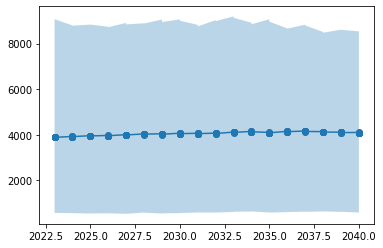

In [12]:
plt.plot(daly_sum['year'], daly_sum['mean'], marker = 'o')
plt.fill_between(daly_sum['year'], daly_sum['2.5%'], daly_sum['97.5%'], alpha = 0.3)

### All Cause Mortality Graphs

In [13]:
result_summary = (deaths
                      .groupby(['age', 'sex', 'year','scenario'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,2.5375,0.0,11.025
1,25_to_29,female,2023,lifestyle_100,2.5375,0.0,11.025
2,25_to_29,female,2023,lifestyle_50,2.5375,0.0,11.025
3,25_to_29,female,2023,outreach_100,2.5375,0.0,11.025
4,25_to_29,female,2023,outreach_50,2.5375,0.0,11.025


In [13]:
%%capture 
from matplotlib.backends.backend_pdf import PdfPages # PDF package

with PdfPages('model13vv_raw_mortality_counts.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure()             
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'Raw death counts: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=1000)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### All Cause Mortality Graph with Rate

In [14]:
person_time = person_time.rename(columns = {'value':'ptvalue'})
per_time_group = person_time.groupby(['age', 'sex', 'year', 'input_draw','scenario']).ptvalue.sum().reset_index()

per_time_group.head()

,age,sex,year,input_draw,scenario,ptvalue
0,25_to_29,female,2023,29,baseline,18332.353183
1,25_to_29,female,2023,29,lifestyle_100,18332.353183
2,25_to_29,female,2023,29,lifestyle_50,18332.353183
3,25_to_29,female,2023,29,outreach_100,18332.353183
4,25_to_29,female,2023,29,outreach_50,18332.353183


In [15]:
results_rate = deaths.groupby(['age', 'sex', 'year', 'input_draw','scenario']).value.sum().reset_index()
results_rate = pd.concat([results_rate, per_time_group.ptvalue], axis=1)
results_rate['mean_rate'] = results_rate['value'] / results_rate['ptvalue']
result_summary = (results_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.001221,0.000513,0.001885
1,25_to_29,female,2023,lifestyle_100,0.001221,0.000513,0.001885
2,25_to_29,female,2023,lifestyle_50,0.001221,0.000513,0.001885
3,25_to_29,female,2023,outreach_100,0.001221,0.000513,0.001885
4,25_to_29,female,2023,outreach_50,0.001221,0.000513,0.001885


In [64]:
%%capture 
with PdfPages('model13_acmr.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.title(f'All Cause Mortality Rate: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.4)
            plt.grid()
            plt.xlabel('Age')
            plt.ylabel('Deaths per Person/Year')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            pdf.savefig(bbox_inches='tight')

In [84]:
%%capture
## Has age and year reversed, so looking at year trend by age group now. 
with PdfPages('model13_acmr_byyear.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for age in result_summary.age.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            plt.title(f'ACMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.1)
            plt.grid()
            plt.xlabel('Years')
            plt.ylabel('Deaths per Person/Year')
            plt.legend(['Baseline','Baseline 95%','Lifestyle','Lifestyle 95%','Outreach','Outreach 95%','Polypill','Polypill 95%'])
            pdf.savefig(bbox_inches='tight')

In [86]:
result_summary_allage = (results_rate
                      .groupby(['sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allage.head()

,sex,year,scenario,mean,2.5%,97.5%
0,female,2023,baseline,0.050239,0.00111,0.285354
1,female,2023,lifestyle_100,0.050239,0.00111,0.285354
2,female,2023,lifestyle_50,0.050239,0.00111,0.285354
3,female,2023,outreach_100,0.050193,0.00111,0.285019
4,female,2023,outreach_50,0.050232,0.00111,0.285354


In [88]:
%%capture
with PdfPages('model13_acmr_allages.pdf') as pdf:
    for sex in result_summary_allage.sex.unique():
        plt.figure() 
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.title(f'ACMR: {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.1)
        plt.grid()
        plt.xlabel('Years')
        plt.ylabel('Deaths per Person/Year')
        plt.legend(['Baseline','Baseline 95%','Lifestyle','Lifestyle 95%','Outreach','Outreach 95%','Polypill','Polypill 95%'])
        pdf.savefig(bbox_inches='tight')

In [89]:
result_summary_allsex = (results_rate
                      .groupby(['age', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allsex.head()

,age,year,scenario,mean,2.5%,97.5%
0,25_to_29,2023,baseline,0.00207,0.000631,0.004072
1,25_to_29,2023,lifestyle_100,0.00207,0.000631,0.004072
2,25_to_29,2023,lifestyle_50,0.00207,0.000631,0.004072
3,25_to_29,2023,outreach_100,0.00207,0.000631,0.004072
4,25_to_29,2023,outreach_50,0.00207,0.000631,0.004072


In [91]:
%%capture
with PdfPages('model13_acmr_allsex.pdf') as pdf:
    for age in result_summary_allsex.age.unique():
        plt.figure() 
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.title(f'ACMR: {age}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.1)
        plt.grid()
        plt.xlabel('Years')
        plt.ylabel('Deaths per Person/Year')
        plt.legend(['Baseline','Baseline 95%','Lifestyle','Lifestyle 95%','Outreach','Outreach 95%','Polypill','Polypill 95%'])
        pdf.savefig(bbox_inches='tight')

### Cause Specific Mortality Graphs
#### Acute Stroke

In [17]:
deaths_cause = (deaths
               .groupby(['age', 'sex', 'year', 'cause','scenario'])
               .value.describe(percentiles=[.025, .975])
               .filter(['mean', '2.5%', '97.5%'])
               .reset_index())

acute = deaths_cause.loc[(deaths_cause['cause'] == 'acute_ischemic_stroke')].reset_index()

acute.head()

,index,age,sex,year,cause,scenario,mean,2.5%,97.5%
0,0,25_to_29,female,2023,acute_ischemic_stroke,baseline,0.2,0.0,1.0
1,1,25_to_29,female,2023,acute_ischemic_stroke,lifestyle_100,0.2,0.0,1.0
2,2,25_to_29,female,2023,acute_ischemic_stroke,lifestyle_50,0.2,0.0,1.0
3,3,25_to_29,female,2023,acute_ischemic_stroke,outreach_100,0.2,0.0,1.0
4,4,25_to_29,female,2023,acute_ischemic_stroke,outreach_50,0.2,0.0,1.0


In [18]:
death_rate_cause = deaths.groupby(['age', 'sex', 'year', 'input_draw', 'cause','scenario']).value.sum().reset_index()
acute_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_ischemic_stroke')].reset_index()
acute_rate.head()

,index,age,sex,year,input_draw,cause,scenario,value
0,0,25_to_29,female,2023,29,acute_ischemic_stroke,baseline,1.0
1,1,25_to_29,female,2023,29,acute_ischemic_stroke,lifestyle_100,1.0
2,2,25_to_29,female,2023,29,acute_ischemic_stroke,lifestyle_50,1.0
3,3,25_to_29,female,2023,29,acute_ischemic_stroke,outreach_100,1.0
4,4,25_to_29,female,2023,29,acute_ischemic_stroke,outreach_50,1.0


In [119]:
acute_rate_2 = pd.concat([acute_rate, per_time_group.ptvalue], axis=1)
acute_rate_2['mean_rate'] = acute_rate_2['value'] / acute_rate_2['ptvalue']

acute_rate_summary = (acute_rate_2
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_rate_summary.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000012,0.0,0.000065
1,25_to_29,female,2023,lifestyle_100,0.000012,0.0,0.000065
2,25_to_29,female,2023,lifestyle_50,0.000012,0.0,0.000065
3,25_to_29,female,2023,outreach_100,0.000012,0.0,0.000065
4,25_to_29,female,2023,outreach_50,0.000012,0.0,0.000065


In [20]:
%%capture 
with PdfPages('model13_acute_csmr.pdf') as pdf:
    for sex in acute_rate_summary.sex.unique():
        for year in acute_rate_summary.year.unique():
            plt.figure() 
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.title(f'Acute Stroke CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.01)
            plt.grid()
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            pdf.savefig(bbox_inches='tight')

#### Chronic Stroke

In [122]:
chronic_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate = pd.concat([chronic_rate, per_time_group.ptvalue], axis=1)
chronic_rate['mean_rate'] = chronic_rate['value'] / chronic_rate['ptvalue']
chronic_rate_summ = (chronic_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate_summ

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000000,0.000000,0.000000
1,25_to_29,female,2023,lifestyle_100,0.000000,0.000000,0.000000
2,25_to_29,female,2023,lifestyle_50,0.000000,0.000000,0.000000
3,25_to_29,female,2023,outreach_100,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
3776,95_plus,male,2040,outreach_100,0.006890,0.000559,0.012169
3777,95_plus,male,2040,outreach_50,0.006961,0.000558,0.012347
3778,95_plus,male,2040,polypill_100,0.008025,0.000548,0.013269
3779,95_plus,male,2040,polypill_50,0.007895,0.000555,0.013560


In [22]:
%%capture
with PdfPages('model13_chronic_csmr.pdf') as pdf:
    for sex in chronic_rate_summ.sex.unique():
        for year in chronic_rate_summ.year.unique():
            plt.figure() 
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Chronic Stroke CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### CSMR for All Stroke

In [250]:
stroke_rate = death_rate_cause.loc[(death_rate_cause['cause'].isin(['chronic_ischemic_stroke','acute_ischemic_stroke']))].reset_index()
stroke_rate = stroke_rate.groupby(['age', 'sex', 'year','scenario','input_draw']).value.sum().reset_index()
stroke_rate = stroke_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw', 'scenario'])
stroke_rate['mean_rate'] = stroke_rate['value'] / stroke_rate['ptvalue']
stroke_rate_summ = (stroke_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

stroke_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000012,0.0,0.000065
1,25_to_29,female,2023,lifestyle_100,0.000012,0.0,0.000065
2,25_to_29,female,2023,lifestyle_50,0.000012,0.0,0.000065
3,25_to_29,female,2023,outreach_100,0.000012,0.0,0.000065
4,25_to_29,female,2023,outreach_50,0.000012,0.0,0.000065


In [251]:
%%capture
with PdfPages('model13_stroke_csmr.pdf') as pdf:
    for sex in stroke_rate_summ.sex.unique():
        for age in stroke_rate_summ.age.unique():
            plt.figure() 
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Stroke CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('Deaths per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### CSMR for All IHD 

In [248]:
IHD_rate = death_rate_cause.loc[(death_rate_cause['cause'].isin(['acute_myocardial_infarction','acute_myocardial_infarction_and_heart_failure','heart_failure_from_ischemic_heart_disease','heart_failure_residual','post_myocardial_infarction']))].reset_index()
IHD_rate = IHD_rate.groupby(['age', 'sex', 'year','scenario','input_draw']).value.sum().reset_index()
IHD_rate = IHD_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw', 'scenario'])
IHD_rate['mean_rate'] = IHD_rate['value'] / IHD_rate['ptvalue']
IHD_rate_summ = (IHD_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

IHD_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000776,0.000175,0.001182
1,25_to_29,female,2023,lifestyle_100,0.000776,0.000175,0.001182
2,25_to_29,female,2023,lifestyle_50,0.000776,0.000175,0.001182
3,25_to_29,female,2023,outreach_100,0.000776,0.000175,0.001182
4,25_to_29,female,2023,outreach_50,0.000776,0.000175,0.001182


In [249]:
%%capture
with PdfPages('model13_IHD_csmr.pdf') as pdf:
    for sex in IHD_rate_summ.sex.unique():
        for age in IHD_rate_summ.age.unique():
            plt.figure() 
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'IHD CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('Deaths per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Acute Myocardial Infarction - includes both heart failure and no heart failure

In [23]:
death_rate_cause.cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction',
       'acute_myocardial_infarction_and_heart_failure',
       'chronic_ischemic_stroke',
       'heart_failure_from_ischemic_heart_disease',
       'heart_failure_residual', 'other_causes',
       'post_myocardial_infarction'], dtype=object)

In [24]:
acute_MI_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_myocardial_infarction') | (death_rate_cause['cause'] == 'acute_myocardial_infarction_and_heart_failure')].reset_index()
acute_MI_rate = acute_MI_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw', 'scenario'])
acute_MI_rate['mean_rate'] = acute_MI_rate['value'] / acute_MI_rate['ptvalue']
acute_MI_rate_summ = (acute_MI_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_MI_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000078,0.0,0.000369
1,25_to_29,female,2023,lifestyle_100,0.000078,0.0,0.000369
2,25_to_29,female,2023,lifestyle_50,0.000078,0.0,0.000369
3,25_to_29,female,2023,outreach_100,0.000078,0.0,0.000369
4,25_to_29,female,2023,outreach_50,0.000078,0.0,0.000369


In [25]:
%%capture
with PdfPages('model13_acute_MI_csmr.pdf') as pdf:
    for sex in acute_MI_rate_summ.sex.unique():
        for year in acute_MI_rate_summ.year.unique():
            plt.figure() 
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.03)
            plt.xlabel('Age')
            plt.ylabel('Deaths per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [26]:
%%capture
with PdfPages('model13_acute_MI_csmr_byyear.pdf') as pdf:
    for sex in acute_MI_rate_summ.sex.unique():
        for age in acute_MI_rate_summ.age.unique():
            plt.figure() 
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.03)
            plt.xlabel('Year')
            plt.ylabel('Death per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Post Myocaridal Infarction

In [27]:
post_MI_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'post_myocardial_infarction')].reset_index()
post_MI_rate = pd.concat([post_MI_rate, per_time_group.ptvalue], axis=1)
post_MI_rate['mean_rate'] = post_MI_rate['value'] / post_MI_rate['ptvalue']
post_MI_rate_summ = (post_MI_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

post_MI_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000127,0.000012,0.00026
1,25_to_29,female,2023,lifestyle_100,0.000127,0.000012,0.00026
2,25_to_29,female,2023,lifestyle_50,0.000127,0.000012,0.00026
3,25_to_29,female,2023,outreach_100,0.000127,0.000012,0.00026
4,25_to_29,female,2023,outreach_50,0.000127,0.000012,0.00026


In [28]:
%%capture
with PdfPages('model13_post_MI_csmr.pdf') as pdf:
    for sex in post_MI_rate_summ.sex.unique():
        for year in post_MI_rate_summ.year.unique():
            plt.figure() 
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.01)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [29]:
%%capture
with PdfPages('model13_post_MI_csmr_byyear.pdf') as pdf:
    for sex in post_MI_rate_summ.sex.unique():
        for age in post_MI_rate_summ.age.unique():
            plt.figure() 
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI CSMR by Year: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [33]:
## Older age groups having an increased CSMR over time. This is probably related to the other issue we 
## have seen with post MI. 

#### Heart Failure

In [30]:
HF_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'heart_failure_from_ischemic_heart_disease') | (death_rate_cause['cause'] == 'heart_failure_residual')].reset_index()
HF_rate = HF_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
HF_rate['mean_rate'] = HF_rate['value'] / HF_rate['ptvalue']
HF_rate_summ = (HF_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

HF_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000246,0.0,0.000859
1,25_to_29,female,2023,lifestyle_100,0.000246,0.0,0.000859
2,25_to_29,female,2023,lifestyle_50,0.000246,0.0,0.000859
3,25_to_29,female,2023,outreach_100,0.000246,0.0,0.000859
4,25_to_29,female,2023,outreach_50,0.000246,0.0,0.000859


In [31]:
%%capture
with PdfPages('model13_HF_csmr.pdf') as pdf:
    for sex in HF_rate_summ.sex.unique():
        for year in HF_rate_summ.year.unique():
            plt.figure() 
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [246]:
%%capture
with PdfPages('model13_HF_csmr_byyear.pdf') as pdf:
    for sex in HF_rate_summ.sex.unique():
        for age in HF_rate_summ.age.unique():
            plt.figure() 
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Excess Mortality rate

#### Post Myocardial Infarction

In [32]:
state_person_time['state'].unique()

array(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure',
       'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_heart_failure_residual',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure',
       'ischemic_stroke_acute_ischemic_stroke',
       'ischemic_stroke_chronic_ischemic_stroke',
       'ischemic_stroke_susceptible_to_ischemic_stroke'], dtype=object)

In [231]:
per_time_state = state_person_time.groupby(['age', 'sex', 'year', 'state', 'input_draw','scenario']).value.sum().reset_index()
per_time_state = per_time_state.rename(columns = {'value':'ptvalue'})
per_time_post_MI = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction')].reset_index()

post_MI_emr = death_rate_cause.loc[(death_rate_cause['cause'] == 'post_myocardial_infarction')].reset_index()
post_MI_emr = pd.concat([post_MI_emr, per_time_post_MI.ptvalue], axis=1)
post_MI_emr['mean_rate'] = post_MI_emr['value'] / post_MI_emr['ptvalue']
post_MI_emr_summ = (post_MI_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

post_MI_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.036569,0.002568,0.059473
1,25_to_29,female,2023,lifestyle_100,0.036569,0.002568,0.059473
2,25_to_29,female,2023,lifestyle_50,0.036569,0.002568,0.059473
3,25_to_29,female,2023,outreach_100,0.036569,0.002568,0.059473
4,25_to_29,female,2023,outreach_50,0.036569,0.002568,0.059473


In [35]:
%%capture
with PdfPages('model13_post_MI_emr.pdf') as pdf:
    for sex in post_MI_emr_summ.sex.unique():
        for year in post_MI_emr_summ.year.unique():
            plt.figure() 
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI EMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Heart Failure EMR

In [36]:
per_time_HF = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease') | (per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual')].reset_index()
HF_emr = death_rate_cause.loc[(death_rate_cause['cause'] == 'heart_failure_from_ischemic_heart_disease') | (death_rate_cause['cause'] == 'heart_failure_residual')].reset_index()
HF_emr = HF_emr.merge(per_time_HF[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
HF_emr['mean_rate'] = HF_emr['value'] / HF_emr['ptvalue']
HF_emr_summ = (HF_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

HF_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.699384,0.0,3.81414
1,25_to_29,female,2023,lifestyle_100,0.699384,0.0,3.81414
2,25_to_29,female,2023,lifestyle_50,0.699384,0.0,3.81414
3,25_to_29,female,2023,outreach_100,0.699384,0.0,3.81414
4,25_to_29,female,2023,outreach_50,0.699384,0.0,3.81414


In [37]:
%%capture
with PdfPages('model13_HF_emr.pdf') as pdf:
    for sex in HF_emr_summ.sex.unique():
        for year in HF_emr_summ.year.unique():
            plt.figure() 
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF EMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

##### Looks weird check with artifact values

### All IHD EMR

In [233]:
per_time_IHD = per_time_state.loc[(per_time_state['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction"]))].reset_index()
per_time_IHD = per_time_IHD.groupby(['age','sex','year','input_draw','scenario']).ptvalue.sum().reset_index()
IHD_emr = death_rate_cause.loc[(death_rate_cause['cause'].isin(['heart_failure_from_ischemic_heart_disease','heart_failure_residual','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','acute_myocardial_infarction_and_heart_failure','acute_myocardial_infarction']))].reset_index()
IHD_emr = IHD_emr.groupby(['age','sex','year','input_draw','scenario']).value.sum().reset_index()
IHD_emr = IHD_emr.merge(per_time_IHD[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
IHD_emr['mean_rate'] = IHD_emr['value'] / IHD_emr['ptvalue']
IHD_emr_summ = (IHD_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

IHD_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.079435,0.017526,0.142835
1,25_to_29,female,2023,lifestyle_100,0.079435,0.017526,0.142835
2,25_to_29,female,2023,lifestyle_50,0.079435,0.017526,0.142835
3,25_to_29,female,2023,outreach_100,0.079467,0.017526,0.142835
4,25_to_29,female,2023,outreach_50,0.079467,0.017526,0.142835


In [252]:
%%capture
with PdfPages('model13_IHD_emr.pdf') as pdf:
    for sex in IHD_emr_summ.sex.unique():
        for age in IHD_emr_summ.age.unique():
            plt.figure() 
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'IHD EMR: {age} {sex}') 
            plt.xlabel('Year')
            plt.ylabel('Death per Person/Year')
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### All Stroke EMR

In [237]:
per_time_stroke = per_time_state.loc[(per_time_state['state'].isin(["ischemic_stroke_acute_ischemic_stroke", "ischemic_stroke_chronic_ischemic_stroke"]))].reset_index()
per_time_stroke = per_time_stroke.groupby(['age','sex','year','input_draw','scenario']).ptvalue.sum().reset_index()
stroke_emr = death_rate_cause.loc[(death_rate_cause['cause'].isin(['acute_ischemic_stroke','chronic_ischemic_stroke']))].reset_index()
stroke_emr = stroke_emr.groupby(['age','sex','year','input_draw','scenario']).value.sum().reset_index()
stroke_emr = stroke_emr.merge(per_time_stroke[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
stroke_emr['mean_rate'] = stroke_emr['value'] / stroke_emr['ptvalue']
stroke_emr_summ = (stroke_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

stroke_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.001085,0.0,0.005727
1,25_to_29,female,2023,lifestyle_100,0.001085,0.0,0.005727
2,25_to_29,female,2023,lifestyle_50,0.001085,0.0,0.005727
3,25_to_29,female,2023,outreach_100,0.001085,0.0,0.005727
4,25_to_29,female,2023,outreach_50,0.001085,0.0,0.005727


In [253]:
%%capture
with PdfPages('model13_stroke_emr.pdf') as pdf:
    for sex in stroke_emr_summ.sex.unique():
        for age in stroke_emr_summ.age.unique():
            plt.figure() 
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Stroke EMR: {age} {sex}') 
            plt.xlabel('Year')
            plt.ylabel('Death per Person/Year')
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Prevalence 

#### Chronic + Acute Stroke

In [38]:
prev_acute = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_acute_ischemic_stroke')].reset_index()
prev_acute = prev_acute.rename(columns = {'ptvalue':'value'})
prev_acute_rate = pd.concat([prev_acute, per_time_group.ptvalue], axis=1)
prev_acute_rate['rate']= prev_acute_rate['value'] / prev_acute_rate['ptvalue']
prev_acute_rate_sum = (prev_acute_rate
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

prev_acute_rate_sum.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000025,9.346532e-07,0.000075
1,25_to_29,female,2023,lifestyle_100,0.000025,9.346532e-07,0.000075
2,25_to_29,female,2023,lifestyle_50,0.000025,9.346532e-07,0.000075
3,25_to_29,female,2023,outreach_100,0.000025,9.346532e-07,0.000075
4,25_to_29,female,2023,outreach_50,0.000025,9.346532e-07,0.000075


In [42]:
%%capture
with PdfPages('model13_acute_stroke_prev.pdf') as pdf:
    for sex in prev_acute_rate_sum.sex.unique():
        for year in prev_acute_rate_sum.year.unique():
            plt.figure() 
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute Stroke Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [41]:
prev_chronic = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_chronic_ischemic_stroke')].reset_index()
prev_chronic = prev_chronic.rename(columns = {'ptvalue':'value'})
prev_chronic_rate = pd.concat([prev_chronic, per_time_group.ptvalue], axis=1)
prev_chronic_rate['rate']= prev_chronic_rate['value'] / prev_chronic_rate['ptvalue']
prev_chronic_rate_sum = (prev_chronic_rate
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [44]:
%%capture
with PdfPages('model13_chronic_stroke_prev.pdf') as pdf:
    for sex in prev_chronic_rate_sum.sex.unique():
        for year in prev_chronic_rate_sum.year.unique():
            plt.figure() 
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Chronic Stroke Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Myocardial Infarction

In [45]:
prev_acute_MI = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction'))].reset_index()
prev_acute_MI = prev_acute_MI.rename(columns = {'ptvalue':'value'})
prev_acute_MI = prev_acute_MI.groupby(['age','sex','year','input_draw','scenario']).value.sum().reset_index()
prev_acute_MI = prev_acute_MI.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_acute_MI['rate']= prev_acute_MI['value'] / prev_acute_MI['ptvalue']
prev_acute_MI_summ = (prev_acute_MI
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_acute_MI_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000069,0.00002,0.000153
1,25_to_29,female,2023,lifestyle_100,0.000069,0.00002,0.000153
2,25_to_29,female,2023,lifestyle_50,0.000069,0.00002,0.000153
3,25_to_29,female,2023,outreach_100,0.000069,0.00002,0.000153
4,25_to_29,female,2023,outreach_50,0.000069,0.00002,0.000153


In [46]:
%%capture
with PdfPages('model13_acute_MI_prev.pdf') as pdf:
    for sex in prev_acute_MI_summ.sex.unique():
        for year in prev_acute_MI_summ.year.unique():
            plt.figure() 
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [47]:
prev_post_MI = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction')].reset_index()
prev_post_MI = prev_post_MI.rename(columns = {'ptvalue':'value'})
prev_post_MI = pd.concat([prev_post_MI, per_time_group.ptvalue], axis=1)
prev_post_MI['rate']= prev_post_MI['value'] / prev_post_MI['ptvalue']
prev_post_MI_summ = (prev_post_MI
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_post_MI_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.002134,0.000926,0.004042
1,25_to_29,female,2023,lifestyle_100,0.002134,0.000926,0.004042
2,25_to_29,female,2023,lifestyle_50,0.002134,0.000926,0.004042
3,25_to_29,female,2023,outreach_100,0.002134,0.000926,0.004042
4,25_to_29,female,2023,outreach_50,0.002134,0.000926,0.004042


In [49]:
%%capture
with PdfPages('model13_post_MI_prev.pdf') as pdf:
    for sex in prev_post_MI_summ.sex.unique():
        for year in prev_post_MI_summ.year.unique():
            plt.figure() 
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [50]:
%%capture
with PdfPages('model13_post_MI_prev_byyear.pdf') as pdf:
    for sex in prev_post_MI_summ.sex.unique():
        for age in prev_post_MI_summ.age.unique():
            plt.figure() 
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI Prevalence: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### This is still looking weird, previously noted 

In [51]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
per_time_sus_post_hf = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_post_myocardial_infarction']))].reset_index()
tran_rate_post_to_hf = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_post_to_hf = tran_rate_post_to_hf.groupby(groupby_cols).sum() / per_time_sus_post_hf.groupby(groupby_cols).sum()
tran_rate_post_to_hf_summ = (tran_rate_post_to_hf.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_post_to_hf_summ.head()

mean  2.5%  97.5%
age      sex    year scenario                        
25_to_29 female 2023 baseline        0.0   0.0    0.0
                     lifestyle_100   0.0   0.0    0.0
                     lifestyle_50    0.0   0.0    0.0
                     outreach_100    0.0   0.0    0.0
                     outreach_50     0.0   0.0    0.0

In [54]:
%%capture
for sex in tran_rate_post_to_hf_summ.index.get_level_values('sex').unique():
    for age in tran_rate_post_to_hf_summ.index.get_level_values('age').unique():
        plt.figure() 
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='baseline')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='lifestyle_100')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='outreach_100')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='polypill_100')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'Post MI to HF Rate Incidence: {age} {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        #plt.ylim(0,0.04)

### Prevalence of Heart Failure

In [57]:
prev_HF = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual'))].reset_index()
prev_HF = prev_HF.rename(columns = {'ptvalue':'value'})
prev_HF = prev_HF.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF['rate']= prev_HF['value'] / prev_HF['ptvalue']
prev_HF_summ = (prev_HF
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.001356,0.000086,0.00299
1,25_to_29,female,2023,lifestyle_100,0.001356,0.000086,0.00299
2,25_to_29,female,2023,lifestyle_50,0.001356,0.000086,0.00299
3,25_to_29,female,2023,outreach_100,0.001356,0.000086,0.00299
4,25_to_29,female,2023,outreach_50,0.001356,0.000086,0.00299


In [66]:
%%capture
for sex in prev_HF_summ.sex.unique():
    for age in prev_HF_summ.age.unique():
        plt.figure() 
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Prevalence: {age} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

In [65]:
%%capture
for sex in prev_HF_summ.sex.unique():
    for year in prev_HF_summ.year.unique():
        plt.figure() 
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='baseline')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='outreach_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='polypill_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Prevalence: {year} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

#### There's some weird patterns but not consistent between age groups

### Incidence of First Time Acute Ischemic Stroke

In [68]:
tran_sum = (tran
                 .groupby(['age', 'sex', 'year', 'transition','scenario'])
                 .value.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_sum_stroke = tran_sum.loc[(tran_sum['transition'] == 'ischemic_stroke_susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_sum_stroke.head()

,index,age,sex,year,transition,scenario,mean,2.5%,97.5%
0,70,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke...,baseline,5.4,0.225,16.75
1,71,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke...,lifestyle_100,5.4,0.225,16.75
2,72,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke...,lifestyle_50,5.4,0.225,16.75
3,73,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke...,outreach_100,5.4,0.225,16.75
4,74,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke...,outreach_50,5.4,0.225,16.75


In [69]:
per_time_sus_stroke = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_susceptible_to_ischemic_stroke')].reset_index()
per_time_sus_stroke.head()

,index,age,sex,year,state,input_draw,scenario,ptvalue
0,560,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,29,baseline,18186.316222
1,561,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,29,lifestyle_100,18186.316222
2,562,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,29,lifestyle_50,18186.316222
3,563,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,29,outreach_100,18186.316222
4,564,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,29,outreach_50,18186.316222


In [70]:
tran_rate = tran.groupby(['age', 'sex', 'year', 'transition', 'input_draw','scenario']).value.sum().reset_index()
tran_rate = tran_rate.loc[(tran_rate['transition'] == 'ischemic_stroke_susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_rate = pd.concat([tran_rate, per_time_group.ptvalue], axis=1)
tran_rate['rate']= tran_rate['value'] / tran_rate['ptvalue']
tran_rate_sum = (tran_rate
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_rate_sum.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000321,0.000012,0.000939
1,25_to_29,female,2023,lifestyle_100,0.000321,0.000012,0.000939
2,25_to_29,female,2023,lifestyle_50,0.000321,0.000012,0.000939
3,25_to_29,female,2023,outreach_100,0.000321,0.000012,0.000939
4,25_to_29,female,2023,outreach_50,0.000321,0.000012,0.000939


In [254]:
%%capture
with PdfPages('model13_acute_stroke_inc.pdf') as pdf:
    for sex in tran_rate_sum.sex.unique():
        for age in tran_rate_sum.age.unique():
            plt.figure() 
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute Stroke Incidence: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('Stroke Events per 100_000 Person Years')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Incidence of First Time Acute MI for Greg 

In [216]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
per_time_sus_MI = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure']))].reset_index()
tran_rate_MI = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_MI_all = tran_rate_MI.groupby(groupby_cols).sum() / per_time_sus_MI.groupby(groupby_cols).sum()
tran_first_MI_summ = (tran_rate_MI_all.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_first_MI_summ.head()

mean      2.5%     97.5%
age      sex    year scenario                                   
25_to_29 female 2023 baseline       0.000519  0.000125  0.001083
                     lifestyle_100  0.000519  0.000125  0.001083
                     lifestyle_50   0.000519  0.000125  0.001083
                     outreach_100   0.000519  0.000125  0.001083
                     outreach_50    0.000519  0.000125  0.001083

In [217]:
%%capture
with PdfPages('model13_first_time_acute_MI_inc.pdf') as pdf:
    for sex in tran_first_MI_summ.index.get_level_values('sex').unique():
        for age in tran_first_MI_summ.index.get_level_values('age').unique():
            plt.figure() 
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'First Time Acute MI Incidence: {sex} {age}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('MI Events per 100_000 Person Years')
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

### Incidence of Acute Myocardial Infraction 

In [72]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
per_time_sus_MI = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease']))].reset_index()
tran_rate_MI = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease_to_acute_myocardial_infarction_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_acute_myocardial_infarction','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_MI_all = tran_rate_MI.groupby(groupby_cols).sum() / per_time_sus_MI.groupby(groupby_cols).sum()
tran_MI_summ = (tran_rate_MI_all.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_MI_summ.head()

mean      2.5%     97.5%
age      sex    year scenario                                   
25_to_29 female 2023 baseline       0.000915  0.000203  0.001986
                     lifestyle_100  0.000915  0.000203  0.001986
                     lifestyle_50   0.000915  0.000203  0.001986
                     outreach_100   0.000915  0.000203  0.001986
                     outreach_50    0.000915  0.000203  0.001986

In [73]:
%%capture
with PdfPages('model13_acute_MI_inc.pdf') as pdf:
    for sex in tran_MI_summ.index.get_level_values('sex').unique():
        for year in tran_MI_summ.index.get_level_values('year').unique():
            plt.figure() 
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI Incidence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            plt.xlabel('Age')
            plt.ylabel('MI Events per 100_000 Person Years')
            plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

In [74]:
%%capture
with PdfPages('model13_acute_MI_inc_byyear.pdf') as pdf:
    for sex in tran_MI_summ.index.get_level_values('sex').unique():
        for age in tran_MI_summ.index.get_level_values('age').unique():
            plt.figure() 
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI Incidence: {year} {age}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('MI Events per 100_000 Person Years')
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

### First Time Incidence of Heart Failure 

In [218]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure']))].reset_index()
tran_rate_HF = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_residual']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_HF = tran_rate_HF.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_summ = (tran_rate_HF.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_summ.head()

mean      2.5%    97.5%
age      sex    year scenario                                  
25_to_29 female 2023 baseline       0.000471  0.000198  0.00075
                     lifestyle_100  0.000471  0.000198  0.00075
                     lifestyle_50   0.000471  0.000198  0.00075
                     outreach_100   0.000471  0.000198  0.00075
                     outreach_50    0.000471  0.000198  0.00075

In [219]:
%%capture
with PdfPages('model13_first_time_HF_inc.pdf') as pdf:
    for sex in tran_rate_HF_summ.index.get_level_values('sex').unique():
        for year in tran_rate_HF_summ.index.get_level_values('year').unique():
            plt.figure() 
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF Incidence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

In [220]:
%%capture
with PdfPages('model13_first_time_HF_inc_byyear.pdf') as pdf:
    for sex in tran_rate_HF_summ.index.get_level_values('sex').unique():
        for age in tran_rate_HF_summ.index.get_level_values('age').unique():
            plt.figure() 
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF Incidence: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

### Ratio in Prevalence of HF IHD to HF Resid 

In [77]:
prev_HF_IHD = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease')].reset_index()
prev_HF_resid = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual')].reset_index()
prev_HF_IHD = prev_HF_IHD.rename(columns = {'ptvalue':'value'})
prev_HF_resid = prev_HF_resid.rename(columns = {'ptvalue':'value'})
prev_HF_IHD = prev_HF_IHD.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_resid = prev_HF_resid.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_IHD['IHD_rate']= prev_HF_IHD['value'] / prev_HF_IHD['ptvalue']
prev_HF_resid['resid_rate']= prev_HF_resid['value'] / prev_HF_resid['ptvalue']
prev_HF_ratio = prev_HF_IHD.merge(prev_HF_resid[['age','sex','year','input_draw','scenario','resid_rate']], on=['age','sex','year','input_draw','scenario'])
prev_HF_ratio['IHD_ratio'] = prev_HF_ratio['IHD_rate']/ (prev_HF_ratio['IHD_rate'] + prev_HF_ratio['resid_rate'])
prev_HF_ratio_summ = (prev_HF_ratio
                 .groupby(['age', 'sex', 'year','scenario'])
                 .IHD_ratio.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_ratio_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.085098,0.03623,0.153983
1,25_to_29,female,2023,lifestyle_100,0.085098,0.03623,0.153983
2,25_to_29,female,2023,lifestyle_50,0.085098,0.03623,0.153983
3,25_to_29,female,2023,outreach_100,0.085098,0.03623,0.153983
4,25_to_29,female,2023,outreach_50,0.085098,0.03623,0.153983


In [79]:
%%capture
for sex in prev_HF_ratio_summ.sex.unique():
    for age in prev_HF_ratio_summ.age.unique():
        plt.figure() 
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Ratio the is IHD Prevalence: {age} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

In [81]:
%%capture
for sex in prev_HF_ratio_summ.sex.unique():
    for year in prev_HF_ratio_summ.year.unique():
        plt.figure() 
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='baseline')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='outreach_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='polypill_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Ratio that is IHD Prevalence: {year} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

### Artifacts

In [94]:
ls /mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/

alabama.hdf  raw_data/  washington.hdf


In [95]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [96]:
art_pop = art.load('population.structure').reset_index()
art_pop.head()

,location,sex,age_start,age_end,year_start,year_end,value
0,Alabama,Female,25.0,30.0,2019,2020,171101.787730
1,Alabama,Female,30.0,35.0,2019,2020,162707.127245
2,Alabama,Female,35.0,40.0,2019,2020,160738.561697
3,Alabama,Female,40.0,45.0,2019,2020,151811.937430
4,Alabama,Female,45.0,50.0,2019,2020,160780.871213


In [97]:
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'sequela.acute_ischemic_stroke.prevalence',
 'sequela.chronic_ischemic_stroke.prevalence',
 'cause.ischemic_stroke.incidence_rate',
 'sequela.acute_ischemic_stroke.disability_weight',
 'sequela.chronic_ischemic_stroke.disability_weight',
 'sequela.acute_ischemic_stroke.excess_mortality_rate',
 'sequela.chronic_ischemic_stroke.excess_mortality_rate',
 'cause.ischemic_stroke.cause_specific_mortality_rate',
 'cause.ischemic_stroke.restrictions',
 'cause.acute_myocardial_infarction.prevalence',
 'cause.post_myocardial_infarction.prevalence',
 'cause.myocardial_infarction.incidence_rate',
 'cause.acute_myocardial_infarction.disability_weight',
 'cause.post_myocardial_infarction.disability_weight',
 'cause.acute_myocardial_infarctio

In [98]:
art_mort = art.load('sequela.acute_ischemic_stroke.excess_mortality_rate').reset_index()
art_mort.head()

,sex,age_start,age_end,year_start,year_end,draw_0,draw_1,draw_2,draw_3,draw_4,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,Female,25.0,30.0,2019,2020,0.31588,0.40003,0.32045,0.38893,0.24140,...,0.27915,0.29902,0.33340,0.28170,0.45043,0.26388,0.31837,0.28815,0.23798,0.20685
1,Female,30.0,35.0,2019,2020,0.30193,0.33175,0.28828,0.37140,0.24475,...,0.27680,0.29742,0.35445,0.23455,0.42553,0.22783,0.26775,0.28548,0.25033,0.25325
2,Female,35.0,40.0,2019,2020,0.28018,0.29485,0.27522,0.29580,0.32445,...,0.29240,0.29728,0.32355,0.24025,0.35158,0.27568,0.30525,0.40163,0.30818,0.44195
3,Female,40.0,45.0,2019,2020,0.24315,0.27495,0.29525,0.26428,0.35000,...,0.28105,0.31522,0.29495,0.24098,0.31315,0.28515,0.32320,0.41060,0.31078,0.45695
4,Female,45.0,50.0,2019,2020,0.19085,0.27205,0.34835,0.27682,0.32140,...,0.24275,0.35128,0.26865,0.23673,0.31025,0.25625,0.32160,0.31240,0.25812,0.29825


In [100]:
def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        #data = data[['draw_29','draw_232','draw_357','draw_394','draw_602','draw_629','draw_650','draw_680','draw_829','draw_949']]
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

#### All Cause Mortality Rates

In [101]:
art_acmr = load_artifact_data('cause', 'all_causes', 'cause_specific_mortality_rate')
art_acmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_acmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000950,0.000706,0.001237,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.001364,0.001029,0.001755,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.001697,0.001285,0.002179,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.002592,0.001978,0.003305,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.003660,0.002792,0.004668,Alabama,cause_specific_mortality_rate,45_to_49


In [111]:
result_summary_allyears = (results_rate.loc[results_rate.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allyears.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.001156,0.000523,0.001941
1,25_to_29,male,0.002524,0.001458,0.003938
2,30_to_34,female,0.001571,0.000891,0.002534
3,30_to_34,male,0.002750,0.001799,0.004201
4,35_to_39,female,0.001918,0.001228,0.002789


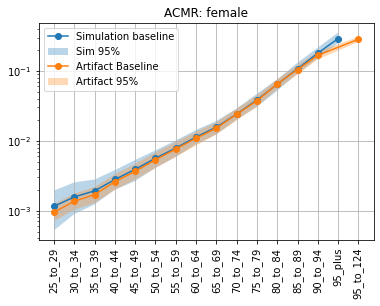

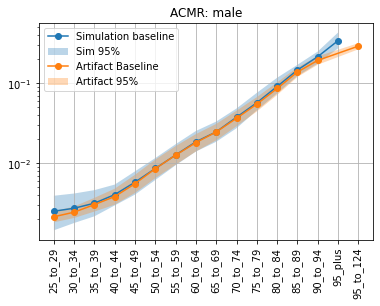

In [112]:
with PdfPages('model13_acmr_artifact_and_sim.pdf') as pdf:
    for sex in result_summary_allyears.sex.unique():
        plt.figure() 
        subdata = result_summary_allyears.loc[(result_summary_allyears.sex==sex)]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_acmr.loc[(art_acmr.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'ACMR: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Cause Specific Mortality Rates

#### Stroke

In [118]:
art_csmr = load_artifact_data('cause', 'ischemic_stroke', 'cause_specific_mortality_rate') 
art_csmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_csmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000002,0.000001,0.000003,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000004,0.000002,0.000007,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000006,0.000003,0.000009,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000011,0.000007,0.000016,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000017,0.000011,0.000026,Alabama,cause_specific_mortality_rate,45_to_49


In [120]:
acute_rate_sum_allyear = (acute_rate_2.loc[acute_rate_2.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

In [123]:
chronic_rate_allyear = (chronic_rate.loc[chronic_rate.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

In [124]:
acute_rate_2 = acute_rate_2.rename(columns = {'mean_rate':'acute_rate'})
chronic_rate = chronic_rate.rename(columns = {'mean_rate':'chronic_rate'})
total_stroke_rate = pd.concat([acute_rate_2, chronic_rate.chronic_rate], axis=1)
total_stroke_rate['total_rate'] = total_stroke_rate['acute_rate'] + total_stroke_rate['chronic_rate']

In [125]:
total_stroke_rate_allyear = (total_stroke_rate
                      .groupby(['age', 'sex'])
                      .total_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
total_stroke_rate_allyear.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000008,0.0,0.000072
1,25_to_29,male,0.000010,0.0,0.000085
2,30_to_34,female,0.000012,0.0,0.000072
3,30_to_34,male,0.000013,0.0,0.000071
4,35_to_39,female,0.000014,0.0,0.000126


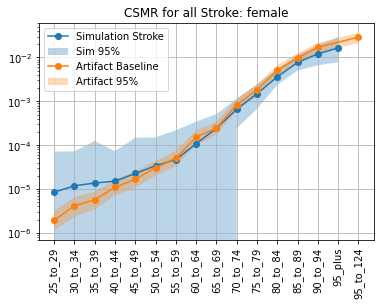

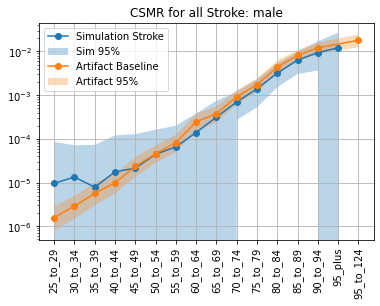

In [126]:
with PdfPages('model13_csmr_artifact_and_sim.pdf') as pdf:
    for sex in acute_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata4 = total_stroke_rate_allyear.loc[(total_stroke_rate_allyear.sex==sex)]
        plt.plot(subdata4['age'], subdata4['mean'], marker='o')
        plt.fill_between(subdata4['age'], subdata4['2.5%'], subdata4['97.5%'], alpha=.3)
        subdata3 = art_csmr.loc[(art_csmr.sex==sex)]
        plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
        plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
        plt.title(f'CSMR for all Stroke: {sex}') 
        plt.xticks(rotation=90) 
        plt.yscale('log')
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation Stroke', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### IHD and HF Combined

In [127]:
art_csmr2 = load_artifact_data('cause', 'ischemic_heart_disease_and_heart_failure', 'cause_specific_mortality_rate') 
art_csmr2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_csmr2.age_start,art_csmr2.age_end)]
art_csmr2.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000546,0.000412,0.000710,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000652,0.000483,0.000838,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000746,0.000545,0.000978,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000804,0.000611,0.001051,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.001383,0.001112,0.001699,Alabama,cause_specific_mortality_rate,45_to_49


In [134]:
IHD_HF_CSMR

,age,sex,year,input_draw,value,ptvalue,mean_rate
0,25_to_29,female,2023,29,88.0,18332.353183,0.004800
1,25_to_29,female,2023,232,119.0,16554.228611,0.007188
2,25_to_29,female,2023,357,7.0,14753.719370,0.000474
3,25_to_29,female,2023,394,85.0,18321.007529,0.004639
...,...,...,...,...,...,...,...
5396,95_plus,male,2040,650,630.0,380.999316,1.653546
5397,95_plus,male,2040,680,679.0,390.888433,1.737069
5398,95_plus,male,2040,829,256.0,191.036277,1.340060
5399,95_plus,male,2040,946,418.0,275.975359,1.514628


In [135]:
IHD_HF_CSMR = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_myocardial_infarction') | (death_rate_cause['cause'] == 'acute_myocardial_infarction_and_heart_failure') | (death_rate_cause['cause'] == 'heart_failure_from_ischemic_heart_disease') | (death_rate_cause['cause'] == 'heart_failure_residual') | (death_rate_cause['cause'] == 'post_myocardial_infarction')].reset_index()
IHD_HF_CSMR = IHD_HF_CSMR.groupby(['age','sex','year','input_draw']).value.sum().reset_index()
IHD_HF_CSMR = IHD_HF_CSMR.merge(per_time_group[['age','sex','year','input_draw','ptvalue']], on=['age','sex','year','input_draw'])
IHD_HF_CSMR['mean_rate'] = IHD_HF_CSMR['value'] / IHD_HF_CSMR['ptvalue']
IHD_HF_CSMR_allyear = (IHD_HF_CSMR
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
IHD_HF_CSMR_allyear

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.005307,0.001629,0.010336
1,25_to_29,male,0.008287,0.002869,0.014457
2,30_to_34,female,0.005935,0.002908,0.010614
3,30_to_34,male,0.008841,0.004569,0.017955
...,...,...,...,...,...
26,90_to_94,female,0.779992,0.540647,1.084642
27,90_to_94,male,1.170747,0.942206,1.457508
28,95_plus,female,1.003301,0.710623,1.372564
29,95_plus,male,1.735077,1.225040,2.286073


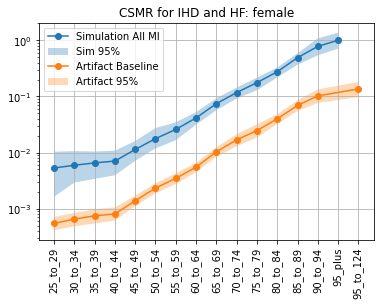

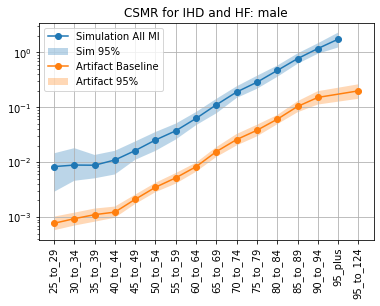

In [136]:
for sex in IHD_HF_CSMR_allyear.sex.unique():
    plt.figure() 
    subdata = IHD_HF_CSMR_allyear.loc[(IHD_HF_CSMR_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_csmr2.loc[(art_csmr2.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'CSMR for IHD and HF: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Incidence Rates for Stroke

In [137]:
art_inc = load_artifact_data('cause', 'ischemic_stroke', 'incidence_rate')
art_inc['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc.age_start,art_inc.age_end)]
art_inc.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000116,0.000050,0.000225,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000163,0.000091,0.000266,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000232,0.000128,0.000381,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000370,0.000242,0.000552,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000579,0.000343,0.000939,Alabama,incidence_rate,45_to_49


In [138]:
tran_rate_sum_allyear = (tran_rate.loc[tran_rate.scenario=='baseline']
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, 0.5, .975])
                 .filter(['50%', '2.5%', '97.5%'])
                 .reset_index())
tran_rate_sum_allyear.head()

,age,sex,year,50%,2.5%,97.5%
0,25_to_29,female,2023,0.000239,0.000012,0.000939
1,25_to_29,female,2024,0.000276,0.000012,0.000546
2,25_to_29,female,2025,0.000257,0.000000,0.000753
3,25_to_29,female,2026,0.000280,0.000025,0.000877
4,25_to_29,female,2027,0.000210,0.000013,0.000663


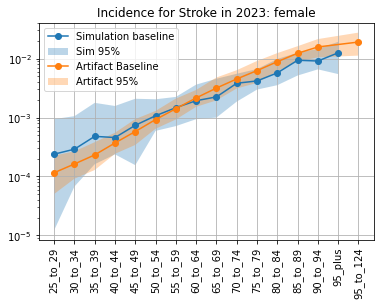

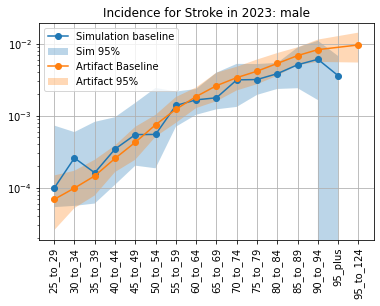

In [139]:
with PdfPages('model13_inc_artifact_and_sim.pdf') as pdf:
    for sex in tran_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex) & (tran_rate_sum_allyear.year==2023)]
        plt.plot(subdata['age'], subdata['50%'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_inc.loc[(art_inc.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'Incidence for Stroke in 2023: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

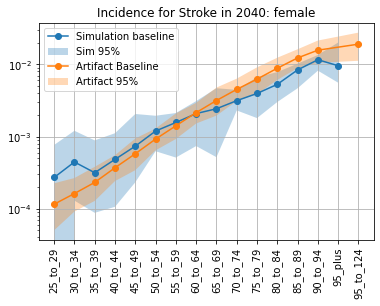

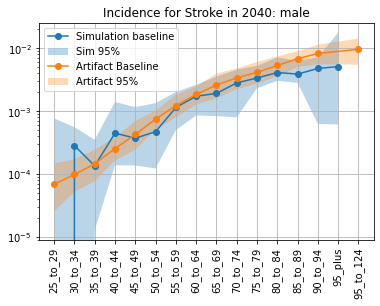

In [140]:
with PdfPages('model13_inc_artifact_and_sim.pdf') as pdf:
    for sex in tran_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex) & (tran_rate_sum_allyear.year==2040)]
        plt.plot(subdata['age'], subdata['50%'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_inc.loc[(art_inc.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'Incidence for Stroke in 2040: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Incidence Rates for MI

In [141]:
art_inc_acute_MI = load_artifact_data('cause', 'myocardial_infarction', 'incidence_rate')
art_inc_acute_MI['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc_acute_MI.age_start,art_inc_acute_MI.age_end)]
art_inc_acute_MI.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000452,0.000284,0.000616,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000510,0.000345,0.000683,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000426,0.000296,0.000581,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000540,0.000414,0.000690,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000850,0.000649,0.001110,Alabama,incidence_rate,45_to_49


In [144]:
groupby_cols2 = ['age', 'sex', 'input_draw']
tran_rate_MI_all = tran_rate_MI.loc[tran_rate_MI.scenario=='baseline'].groupby(groupby_cols2).sum() / per_time_sus_MI.loc[per_time_sus_MI.scenario=='baseline'].groupby(groupby_cols2).sum()
tran_MI_summ_allyear = (tran_rate_MI_all.groupby([c for c in groupby_cols2 if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.5, 0.975])
                   .filter(['mean','50%', '2.5%', '97.5%']))
                 
tran_MI_summ_allyear.head()

mean       50%      2.5%     97.5%
age      sex                                           
25_to_29 female  0.000977  0.000864  0.000255  0.002282
         male    0.001363  0.001298  0.000398  0.003204
30_to_34 female  0.001142  0.001061  0.000417  0.002347
         male    0.001729  0.001117  0.000729  0.004901
35_to_39 female  0.000900  0.000741  0.000406  0.001849

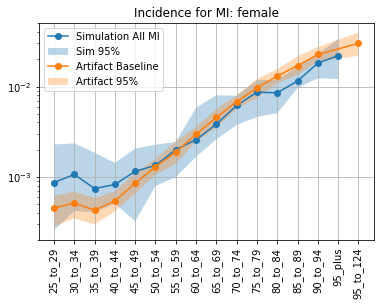

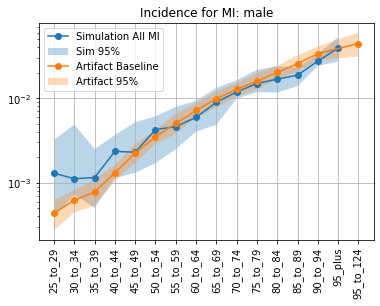

In [145]:
for sex in tran_MI_summ_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_MI_summ_allyear.loc[(tran_MI_summ_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['50%'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_inc_acute_MI.loc[(art_inc_acute_MI.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Incidence Rates for Heart Failure IHD

In [146]:
art_inc_HF_IHD = load_artifact_data('cause', 'heart_failure_from_ischemic_heart_disease', 'incidence_rate')
art_inc_HF_IHD['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc_HF_IHD.age_start,art_inc_HF_IHD.age_end)]
art_inc_HF_IHD.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000057,0.000041,0.000075,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000081,0.000060,0.000104,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000089,0.000056,0.000130,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000185,0.000138,0.000239,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000497,0.000408,0.000590,Alabama,incidence_rate,45_to_49


In [149]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure']))].reset_index()
tran_rate_HF_IHD = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease']))].reset_index()
groupby_cols = ['age', 'sex', 'input_draw','scenario']
tran_rate_HF_IHD = tran_rate_HF_IHD.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_IHD_allyear = (tran_rate_HF_IHD.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_IHD_allyear = tran_rate_HF_IHD_allyear.loc[tran_rate_HF_IHD_allyear.index.get_level_values('scenario')=='baseline']
tran_rate_HF_IHD_allyear.head()

mean      2.5%     97.5%
age      sex    scenario                              
25_to_29 female baseline  0.000068  0.000031  0.000117
         male   baseline  0.000140  0.000098  0.000182
30_to_34 female baseline  0.000086  0.000041  0.000126
         male   baseline  0.000191  0.000134  0.000242
35_to_39 female baseline  0.000111  0.000068  0.000138

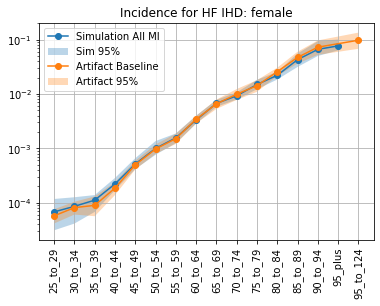

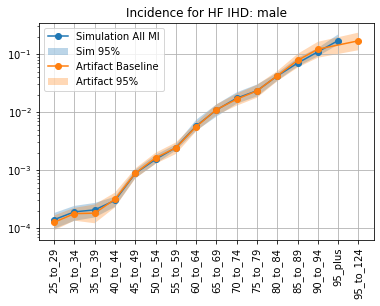

In [150]:
for sex in tran_rate_HF_IHD_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_rate_HF_IHD_allyear.loc[(tran_rate_HF_IHD_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_inc_HF_IHD.loc[(art_inc_HF_IHD.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for HF IHD: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Incidence Rates for Heart Failure Residual

In [151]:
art_inc_HF_resid = load_artifact_data('cause', 'heart_failure_residual', 'incidence_rate')
art_inc_HF_resid['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc_HF_resid.age_start,art_inc_HF_resid.age_end)]
art_inc_HF_resid.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000601,0.000435,0.000792,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000568,0.000423,0.000728,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000395,0.000249,0.000574,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000683,0.000509,0.000880,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.001313,0.001078,0.001558,Alabama,incidence_rate,45_to_49


In [153]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure']))].reset_index()
tran_rate_HF_resid = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_residual']))].reset_index()
groupby_cols = ['age', 'sex', 'input_draw','scenario']
tran_rate_HF_resid = tran_rate_HF_resid.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_resid_allyear = (tran_rate_HF_resid.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_resid_allyear = tran_rate_HF_resid_allyear.loc[tran_rate_HF_resid_allyear.index.get_level_values('scenario')=='baseline']
tran_rate_HF_resid_allyear.head()

mean      2.5%     97.5%
age      sex    scenario                              
25_to_29 female baseline  0.000656  0.000443  0.000860
         male   baseline  0.000933  0.000743  0.001024
30_to_34 female baseline  0.000631  0.000471  0.000740
         male   baseline  0.000781  0.000564  0.000970
35_to_39 female baseline  0.000484  0.000365  0.000576

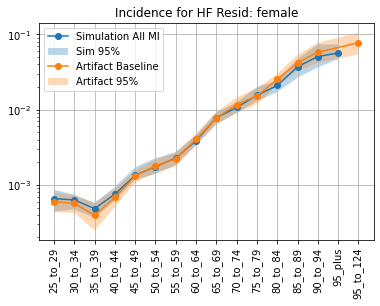

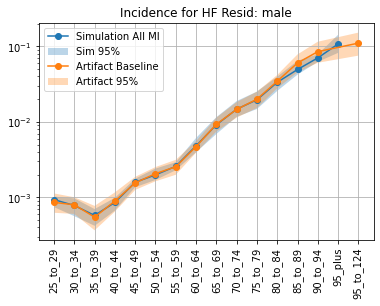

In [154]:
for sex in tran_rate_HF_resid_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_rate_HF_resid_allyear.loc[(tran_rate_HF_resid_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_inc_HF_resid.loc[(art_inc_HF_resid.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for HF Resid: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

Matches the artifact but the artifact looks weird for the youngest folks 

#### Prevalence Rates

In [155]:
prev_chronic_rate_sum_allyear = (prev_chronic_rate.loc[prev_chronic_rate.scenario=='baseline']
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [156]:
art_prev = load_artifact_data('sequela', 'chronic_ischemic_stroke', 'prevalence')
art_prev['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev.age_start,art_prev.age_end)]
art_prev.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.004986,0.003708,0.006410,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.006119,0.004613,0.007857,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.007737,0.005971,0.010016,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.010115,0.007659,0.013100,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.014078,0.010695,0.018031,Alabama,prevalence,45_to_49


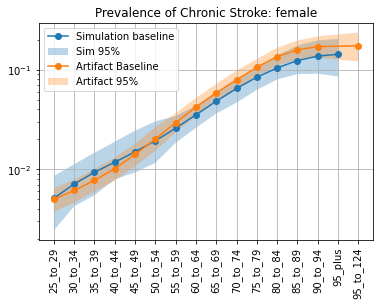

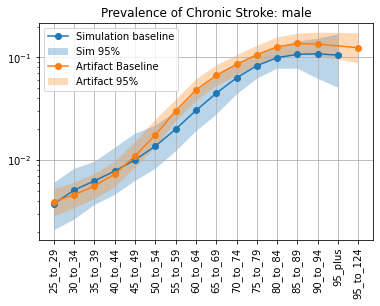

In [157]:
for sex in prev_chronic_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_chronic_rate_sum_allyear.loc[(prev_chronic_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev.loc[(art_prev.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Chronic Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [158]:
prev_acute_rate_sum_allyear = (prev_acute_rate.loc[prev_acute_rate.scenario=='baseline']
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [159]:
art_prev2 = load_artifact_data('sequela', 'acute_ischemic_stroke', 'prevalence')
art_prev2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev2.age_start,art_prev2.age_end)]

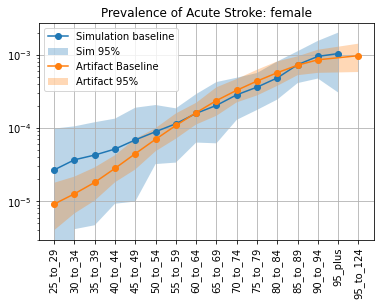

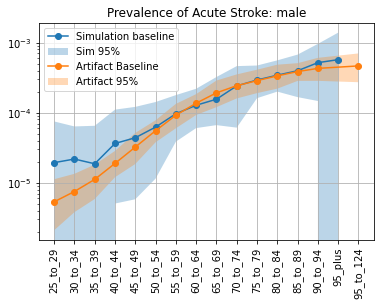

In [160]:
for sex in prev_acute_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_acute_rate_sum_allyear.loc[(prev_acute_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev2.loc[(art_prev2.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Prevalence of Post MI

In [161]:
art_prev3 = load_artifact_data('cause', 'post_myocardial_infarction', 'prevalence')
art_prev3['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev3.age_start,art_prev3.age_end)]
art_prev3.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.001227,0.000904,0.001572,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.002536,0.001865,0.003277,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.004012,0.003125,0.005009,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.005660,0.004450,0.007101,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.007613,0.005996,0.009425,Alabama,prevalence,45_to_49


In [162]:
prev_post_MI_sum_allyear = (prev_post_MI.loc[prev_post_MI.scenario=='baseline']
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_post_MI_sum_allyear.head()

,age,sex,year,mean,2.5%,97.5%
0,25_to_29,female,2023,0.002134,0.000926,0.004042
1,25_to_29,female,2024,0.002354,0.000873,0.004292
2,25_to_29,female,2025,0.002552,0.001073,0.004525
3,25_to_29,female,2026,0.002613,0.001077,0.004582
4,25_to_29,female,2027,0.002725,0.001231,0.004812


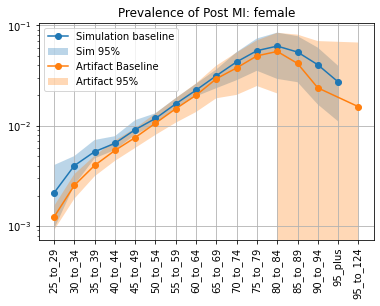

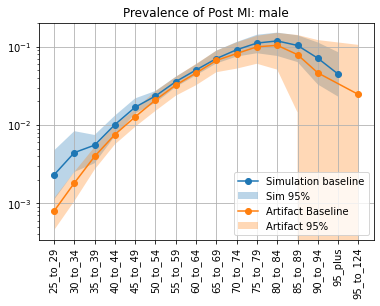

In [163]:
##Can try plotting the median 

for sex in prev_post_MI_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_post_MI_sum_allyear.loc[(prev_post_MI_sum_allyear.sex==sex) & (prev_post_MI_sum_allyear.year == 2023)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev3.loc[(art_prev3.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Post MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [121]:
## 2023 looks pretty good but 2040 looks pretty bad 

#### Prevalence of Acute MI

In [164]:
art_prev4 = load_artifact_data('cause', 'acute_myocardial_infarction', 'prevalence')
art_prev4['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev4.age_start,art_prev4.age_end)]
art_prev4.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000029,0.000019,0.000040,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.000036,0.000024,0.000048,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.000031,0.000022,0.000042,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.000037,0.000028,0.000048,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.000058,0.000044,0.000074,Alabama,prevalence,45_to_49


In [165]:
prev_acute_MI_sum_allyear = (prev_acute_MI.loc[prev_acute_MI.scenario=='baseline']
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_acute_MI_sum_allyear.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000075,0.000010,0.000212
1,25_to_29,male,0.000103,0.000015,0.000305
2,30_to_34,female,0.000087,0.000021,0.000197
3,30_to_34,male,0.000131,0.000038,0.000455
4,35_to_39,female,0.000069,0.000020,0.000182


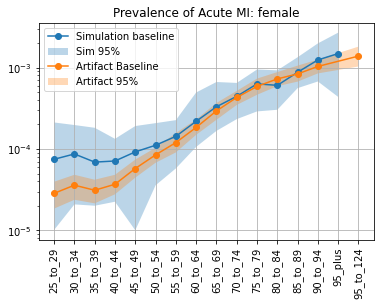

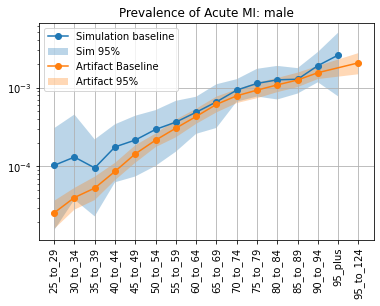

In [166]:
for sex in prev_acute_MI_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_acute_MI_sum_allyear.loc[(prev_acute_MI_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev4.loc[(art_prev4.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Acute MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Prevalence of Heart Failure IHD

In [167]:
art_prev_hf_ihd = load_artifact_data('cause', 'heart_failure_from_ihd', 'prevalence')
art_prev_hf_ihd['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev_hf_ihd.age_start,art_prev_hf_ihd.age_end)]
art_prev_hf_ihd.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000169,0.000080,0.000298,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.000376,0.000216,0.000611,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.000471,0.000237,0.000849,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.000545,0.000286,0.000963,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.001123,0.000589,0.002021,Alabama,prevalence,45_to_49


In [168]:
prev_HF_IHD = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease')].reset_index()
prev_HF_IHD = prev_HF_IHD.rename(columns = {'ptvalue':'value'})
prev_HF_IHD = prev_HF_IHD.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_IHD['rate']= prev_HF_IHD['value'] / prev_HF_IHD['ptvalue']
prev_HF_IHD_allyear = (prev_HF_IHD
                 .groupby(['age', 'sex','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_IHD_allyear = prev_HF_IHD_allyear.loc[prev_HF_IHD_allyear.scenario=='baseline']
prev_HF_IHD_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.000218,0.000008,0.000492
7,25_to_29,male,baseline,0.000390,0.000148,0.000744
14,30_to_34,female,baseline,0.000396,0.000060,0.000764
21,30_to_34,male,baseline,0.000759,0.000331,0.001184
28,35_to_39,female,baseline,0.000558,0.000153,0.000995


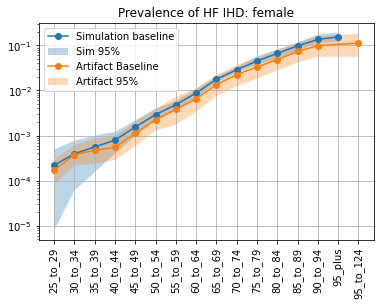

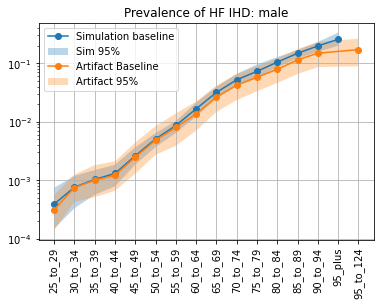

In [169]:
for sex in prev_HF_IHD_allyear.sex.unique():
    plt.figure() 
    subdata = prev_HF_IHD_allyear.loc[(prev_HF_IHD_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev_hf_ihd.loc[(art_prev_hf_ihd.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of HF IHD: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

## Prevalence of Heart Failure Residual

In [170]:
art_prev_hf_resid = load_artifact_data('cause', 'heart_failure_residual', 'prevalence')
art_prev_hf_resid['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev_hf_resid.age_start,art_prev_hf_resid.age_end)]
art_prev_hf_resid.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.002341,0.001774,0.003021,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.003290,0.002414,0.004362,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.002993,0.002267,0.003813,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.002735,0.002134,0.003475,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.004126,0.003504,0.004772,Alabama,prevalence,45_to_49


In [171]:
prev_HF_resid = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual')].reset_index()
prev_HF_resid = prev_HF_resid.rename(columns = {'ptvalue':'value'})
prev_HF_resid = prev_HF_resid.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_resid['rate']= prev_HF_resid['value'] / prev_HF_resid['ptvalue']
prev_HF_resid_allyear = (prev_HF_resid
                 .groupby(['age', 'sex','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

prev_HF_resid_allyear = prev_HF_resid_allyear.loc[prev_HF_resid_allyear.scenario == 'baseline']
prev_HF_resid_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.002577,0.001676,0.003412
7,25_to_29,male,baseline,0.003209,0.002123,0.004092
14,30_to_34,female,baseline,0.003545,0.002172,0.005098
21,30_to_34,male,baseline,0.004357,0.003060,0.005938
28,35_to_39,female,baseline,0.003571,0.002336,0.004989


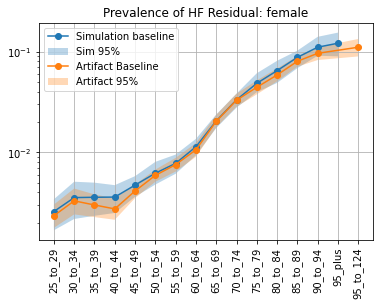

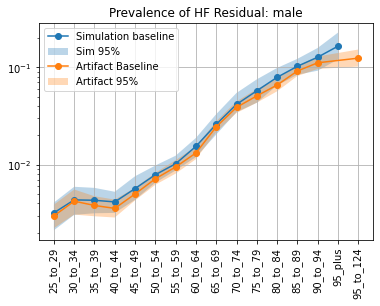

In [172]:
for sex in prev_HF_resid_allyear.sex.unique():
    plt.figure() 
    subdata = prev_HF_resid_allyear.loc[(prev_HF_resid_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev_hf_resid.loc[(art_prev_hf_resid.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of HF Residual: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

## Excess Mortality Rate

#### Acute Stroke

In [173]:
art_emr = load_artifact_data('sequela', 'acute_ischemic_stroke', 'excess_mortality_rate')
art_emr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr.age_start,art_emr.age_end)]
art_emr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.309244,0.212204,0.442095,Alabama,excess_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.293380,0.198519,0.416337,Alabama,excess_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.323206,0.234077,0.432974,Alabama,excess_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.322984,0.238528,0.438779,Alabama,excess_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.292713,0.203912,0.393501,Alabama,excess_mortality_rate,45_to_49


In [174]:
prev_acute = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_acute_ischemic_stroke')].reset_index()
acute_rate_emr = pd.concat([acute_rate, prev_acute.ptvalue], axis=1)
acute_rate_emr['mean_rate'] = acute_rate_emr['value'] / acute_rate_emr['ptvalue']

acute_rate_sum_allyear = (acute_rate_emr
                      .groupby(['age', 'sex','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
acute_rate_sum_allyear=acute_rate_sum_allyear.loc[acute_rate_sum_allyear.scenario=='baseline']
acute_rate_sum_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.472483,0.0,4.783036
7,25_to_29,male,baseline,0.364574,0.0,2.608929
14,30_to_34,female,baseline,0.295254,0.0,2.608929
21,30_to_34,male,baseline,0.701880,0.0,6.522321
28,35_to_39,female,baseline,0.308595,0.0,2.174107


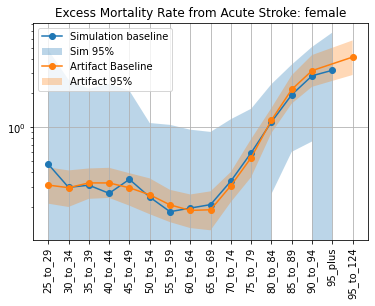

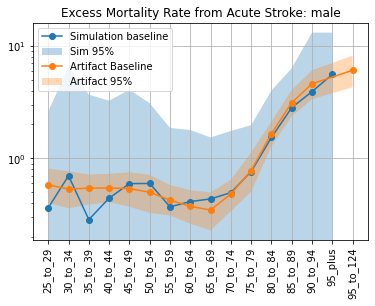

In [175]:
for sex in acute_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = acute_rate_sum_allyear.loc[(acute_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr.loc[(art_emr.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Chronic Stroke

In [176]:
art_emr2 = load_artifact_data('sequela', 'chronic_ischemic_stroke', 'excess_mortality_rate')
art_emr2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr2.age_start,art_emr2.age_end)]

In [177]:
chronic = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_chronic_ischemic_stroke')].reset_index()
#chronic = chronic.rename(columns = {'value':'ptvalue'})
chronic_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate_emr = pd.concat([chronic_rate, chronic.ptvalue], axis=1)
chronic_rate_emr['mean_rate'] = chronic_rate_emr['value'] / chronic_rate_emr['ptvalue']
chronic_rate_emr_allyear = (chronic_rate_emr
                      .groupby(['age', 'sex','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate_emr_allyear=chronic_rate_emr_allyear.loc[chronic_rate_emr_allyear.scenario=='baseline']
chronic_rate_emr_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.000000,0.0,0.0
7,25_to_29,male,baseline,0.000000,0.0,0.0
14,30_to_34,female,baseline,0.000109,0.0,0.0
21,30_to_34,male,baseline,0.000064,0.0,0.0
28,35_to_39,female,baseline,0.000166,0.0,0.0


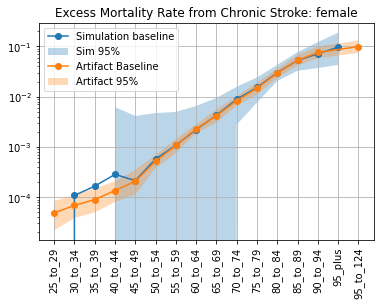

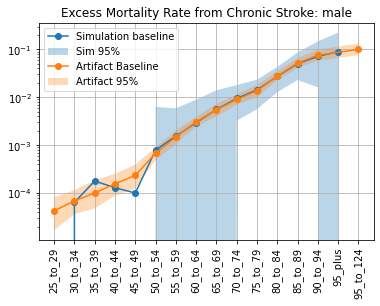

In [178]:
for sex in chronic_rate_emr_allyear.sex.unique():
    plt.figure() 
    subdata = chronic_rate_emr_allyear.loc[(chronic_rate_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr2.loc[(art_emr2.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Chronic Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Acute MI

In [179]:
art_emr_acuteMI = load_artifact_data('cause', 'acute_myocardial_infarction', 'excess_mortality_rate')
art_emr_acuteMI['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr_acuteMI.age_start,art_emr_acuteMI.age_end)]

In [180]:
acute_MI_EMR = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction'))].reset_index()
acute_MI_EMR = acute_MI_EMR.groupby(['age','year','sex','input_draw','scenario']).ptvalue.sum().reset_index()
acute_MI_emr_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_myocardial_infarction_and_heart_failure') | (death_rate_cause['cause'] == 'acute_myocardial_infarction')].reset_index()
acute_MI_emr_rate = acute_MI_emr_rate.groupby(['age','year','sex','input_draw','scenario']).value.sum().reset_index()
acute_MI_emr_rate = acute_MI_emr_rate.merge(acute_MI_EMR[['age','year','sex','input_draw','scenario','ptvalue']], on=['age','year','sex','input_draw','scenario'])
acute_MI_emr_rate['mean_rate'] = acute_MI_emr_rate['value'] / acute_MI_emr_rate['ptvalue']
acute_MI_emr_rate_allyear = (acute_MI_emr_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
acute_MI_emr_rate_allyear=acute_MI_emr_rate_allyear.loc[acute_MI_emr_rate_allyear.scenario=='baseline']
acute_MI_emr_rate_allyear.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,2.466175,0.209646,5.788560
7,25_to_29,female,2024,baseline,1.748603,0.000000,5.605120
14,25_to_29,female,2025,baseline,3.336337,1.145813,6.522321
21,25_to_29,female,2026,baseline,3.060628,0.209646,7.815915
28,25_to_29,female,2027,baseline,3.471550,0.338659,6.359263


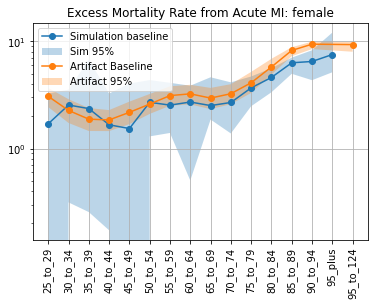

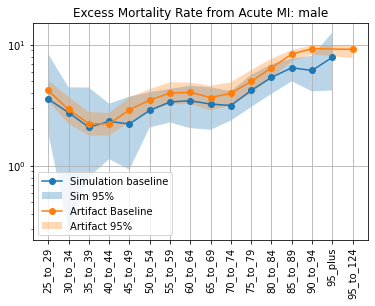

In [181]:
for sex in acute_MI_emr_rate_allyear.sex.unique():
    plt.figure() 
    subdata = acute_MI_emr_rate_allyear.loc[(acute_MI_emr_rate_allyear.sex==sex) & (acute_MI_emr_rate_allyear.year==2040)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr_acuteMI.loc[(art_emr_acuteMI.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Acute MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Post MI EMR

In [182]:
post_mi_rate_emr_allyear = (post_MI_emr.loc[post_MI_emr.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())


post_mi_rate_emr_allyear.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.047754,0.0,0.127339
1,25_to_29,male,0.052004,0.0,0.127964
2,30_to_34,female,0.025763,0.0,0.059369
3,30_to_34,male,0.027925,0.0,0.067140
4,35_to_39,female,0.015208,0.0,0.042345


In [183]:
art_emr_postMI = load_artifact_data('cause', 'post_myocardial_infarction', 'excess_mortality_rate')
art_emr_postMI['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr_postMI.age_start,art_emr_postMI.age_end)]

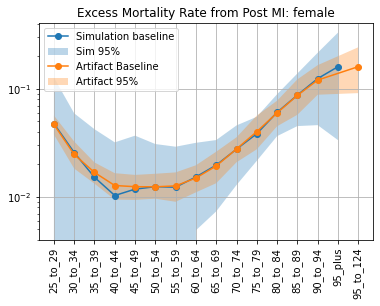

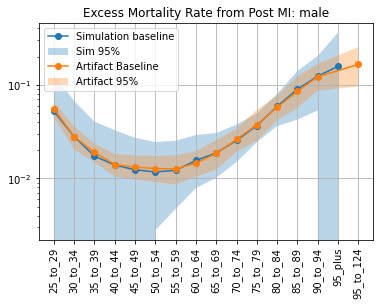

In [184]:
for sex in post_mi_rate_emr_allyear.sex.unique():
    plt.figure() 
    subdata = post_mi_rate_emr_allyear.loc[(post_mi_rate_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr_postMI.loc[(art_emr_postMI.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Post MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### EMR for Heart Failure

In [185]:
art_emr_HF = load_artifact_data('cause', 'heart_failure', 'excess_mortality_rate')
art_emr_HF['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr_HF.age_start,art_emr_HF.age_end)]
art_emr_HF.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.157219,0.111406,0.216535,Alabama,excess_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.136440,0.095899,0.187640,Alabama,excess_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.169535,0.122948,0.222670,Alabama,excess_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.192198,0.141037,0.254912,Alabama,excess_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.204429,0.163795,0.255060,Alabama,excess_mortality_rate,45_to_49


In [186]:
HF_emr_allyear = (HF_emr.loc[HF_emr.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025,0.5, .975])
                      .filter(['mean','50%', '2.5%', '97.5%'])
                      .reset_index())


HF_emr_allyear.head()

,age,sex,mean,50%,2.5%,97.5%
0,25_to_29,female,inf,0.128098,0.0,6.587545
1,25_to_29,male,inf,0.180947,0.0,3.272031
2,30_to_34,female,0.517266,0.122849,0.0,3.039326
3,30_to_34,male,0.328926,0.152099,0.0,1.771559
4,35_to_39,female,inf,0.161577,0.0,2.228509


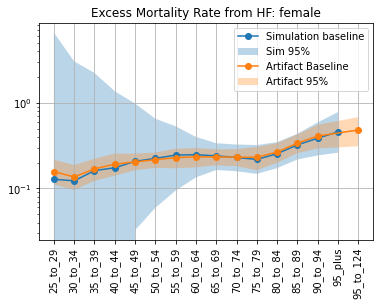

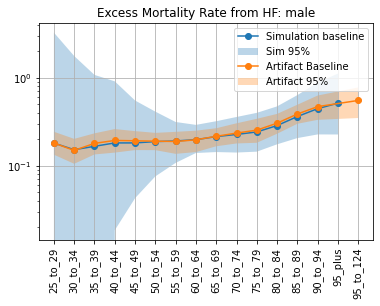

In [187]:
for sex in HF_emr_allyear.sex.unique():
    plt.figure() 
    subdata = HF_emr_allyear.loc[(HF_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['50%'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr_HF.loc[(art_emr_HF.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from HF: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

Looks a little wild in the youngest age groups but I think this is likely just due to very small sample sizes 

When I changed it to the median it matches exactly

# GBD Comparison

#### All Cause Mortality Rate

In [188]:
gbd_data = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=294, measure_id=1, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')

In [189]:
gbd_data['age'] = gbd_data.age_group_name.str.replace(' ', '_')
gbd_data.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower,age
0,10,294,523,1,3,1,2019,_all,25 to 29,All causes,False,Alabama,admin1,Deaths,Rate,Male,0.002153,0.002516,0.001834,25_to_29
1,10,294,523,1,3,2,2019,_all,25 to 29,All causes,False,Alabama,admin1,Deaths,Rate,Female,0.000950,0.001237,0.000706,25_to_29
2,11,294,523,1,3,1,2019,_all,30 to 34,All causes,False,Alabama,admin1,Deaths,Rate,Male,0.002456,0.002887,0.002079,30_to_34
3,11,294,523,1,3,2,2019,_all,30 to 34,All causes,False,Alabama,admin1,Deaths,Rate,Female,0.001364,0.001755,0.001029,30_to_34
4,12,294,523,1,3,1,2019,_all,35 to 39,All causes,False,Alabama,admin1,Deaths,Rate,Male,0.003056,0.003710,0.002501,35_to_39


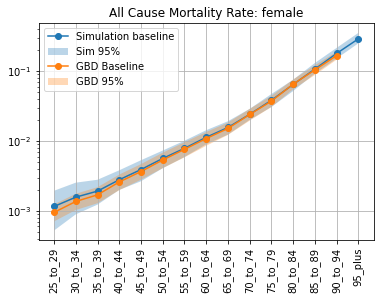

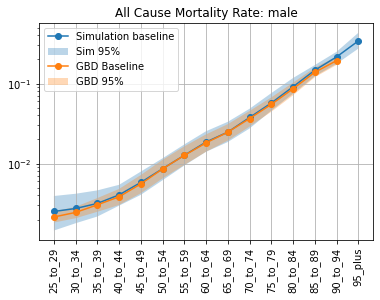

In [190]:
for sex in result_summary_allyears.sex.unique():
    plt.figure() 
    subdata = result_summary_allyears.loc[(result_summary_allyears.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_data.loc[(gbd_data.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'All Cause Mortality Rate: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### Incidence Rate for Stroke

In [191]:
gbd_incd = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=495, measure_id=6, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')

In [192]:
gbd_incd['age'] = gbd_incd.age_group_name.str.replace(' ', '_')
gbd_incd.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower,age
0,10,495,523,6,3,1,2019,cvd_stroke_isch,25 to 29,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Male,0.000068,0.000147,0.000025,25_to_29
1,10,495,523,6,3,2,2019,cvd_stroke_isch,25 to 29,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Female,0.000115,0.000224,0.000050,25_to_29
2,11,495,523,6,3,1,2019,cvd_stroke_isch,30 to 34,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Male,0.000098,0.000171,0.000052,30_to_34
3,11,495,523,6,3,2,2019,cvd_stroke_isch,30 to 34,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Female,0.000162,0.000265,0.000091,30_to_34
4,12,495,523,6,3,1,2019,cvd_stroke_isch,35 to 39,Ischemic stroke,False,Alabama,admin1,Incidence,Rate,Male,0.000145,0.000243,0.000077,35_to_39


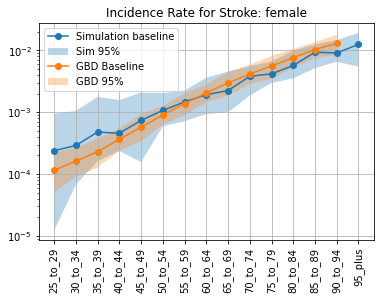

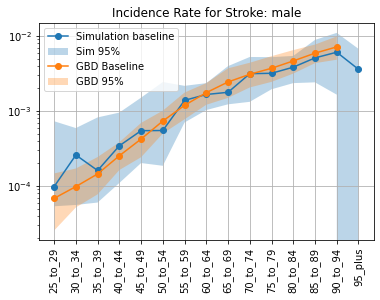

In [212]:
for sex in tran_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex) & (tran_rate_sum_allyear.year==2023)]
    plt.plot(subdata['age'], subdata['50%'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd.loc[(gbd_incd.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'Incidence Rate for Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### Incidence Rate for MI

In [194]:
gbd_incd_MI = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=493, measure_id=6, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')
gbd_incd_MI['age'] = gbd_incd_MI.age_group_name.str.replace(' ', '_')
gbd_incd_MI.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower,age
0,10,493,523,6,3,1,2019,cvd_ihd,25 to 29,Ischemic heart disease,False,Alabama,admin1,Incidence,Rate,Male,0.000441,0.000626,0.000274,25_to_29
1,10,493,523,6,3,2,2019,cvd_ihd,25 to 29,Ischemic heart disease,False,Alabama,admin1,Incidence,Rate,Female,0.000452,0.000616,0.000284,25_to_29
2,11,493,523,6,3,1,2019,cvd_ihd,30 to 34,Ischemic heart disease,False,Alabama,admin1,Incidence,Rate,Male,0.000621,0.000818,0.000448,30_to_34
3,11,493,523,6,3,2,2019,cvd_ihd,30 to 34,Ischemic heart disease,False,Alabama,admin1,Incidence,Rate,Female,0.000510,0.000683,0.000345,30_to_34
4,12,493,523,6,3,1,2019,cvd_ihd,35 to 39,Ischemic heart disease,False,Alabama,admin1,Incidence,Rate,Male,0.000777,0.001081,0.000536,35_to_39


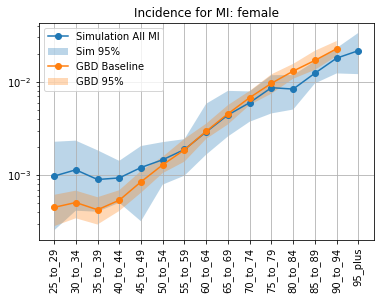

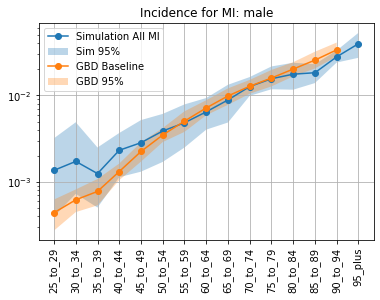

In [195]:
for sex in tran_MI_summ_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_MI_summ_allyear.loc[(tran_MI_summ_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd_MI.loc[(gbd_incd_MI.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'Incidence for MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### Incidence for MI based on all person_time 

In [199]:
tran_rate_MI_GBD = tran.groupby(['age', 'sex', 'year', 'transition', 'input_draw','scenario']).value.sum().reset_index()
tran_rate_MI_GBD = tran_rate_MI_GBD.loc[(tran_rate_MI_GBD['transition'].isin(['ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease_to_acute_myocardial_infarction_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_acute_myocardial_infarction','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction']))].reset_index()
tran_rate_MI_GBD = tran_rate_MI_GBD.groupby(['age', 'sex', 'year', 'input_draw','scenario']).value.sum().reset_index()
tran_rate_MI_GBD = pd.concat([tran_rate_MI_GBD, per_time_group.ptvalue], axis=1)
tran_rate_MI_GBD['rate']= tran_rate_MI_GBD['value'] / tran_rate_MI_GBD['ptvalue']
tran_rate_MI_GBD_summ = (tran_rate_MI_GBD
                 .groupby(['age', 'sex','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_rate_MI_GBD_summ=tran_rate_MI_GBD_summ.loc[tran_rate_MI_GBD_summ.scenario=='baseline']
tran_rate_MI_GBD_summ.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.000975,0.000124,0.002706
7,25_to_29,male,baseline,0.001353,0.000178,0.003945
14,30_to_34,female,baseline,0.001138,0.000272,0.002602
21,30_to_34,male,baseline,0.001721,0.000471,0.005701
28,35_to_39,female,baseline,0.000897,0.000252,0.002179


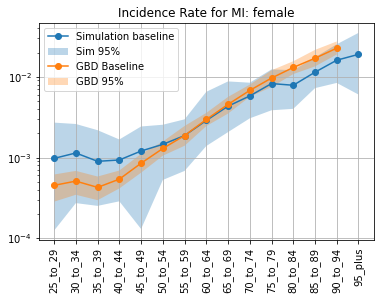

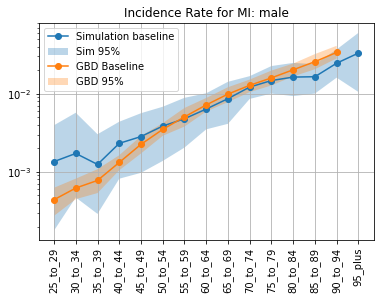

In [200]:
for sex in tran_rate_MI_GBD_summ.sex.unique():
    plt.figure() 
    subdata = tran_rate_MI_GBD_summ.loc[(tran_rate_MI_GBD_summ.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd_MI.loc[(gbd_incd_MI.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'Incidence Rate for MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### DALYs from Acute MI

In [201]:
gbd_daly_MI = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=493, measure_id=2, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')

In [202]:
gbd_daly_MI['age'] = gbd_daly_MI.age_group_name.str.replace(' ', '_')
gbd_daly_MI.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower,age
0,10,493,523,2,3,1,2019,cvd_ihd,25 to 29,Ischemic heart disease,False,Alabama,admin1,DALYs (Disability-Adjusted Life Years),Rate,Male,0.002084,0.002684,0.001595,25_to_29
1,10,493,523,2,3,2,2019,cvd_ihd,25 to 29,Ischemic heart disease,False,Alabama,admin1,DALYs (Disability-Adjusted Life Years),Rate,Female,0.001076,0.001488,0.000753,25_to_29
2,11,493,523,2,3,1,2019,cvd_ihd,30 to 34,Ischemic heart disease,False,Alabama,admin1,DALYs (Disability-Adjusted Life Years),Rate,Male,0.005151,0.006505,0.003896,30_to_34
3,11,493,523,2,3,2,2019,cvd_ihd,30 to 34,Ischemic heart disease,False,Alabama,admin1,DALYs (Disability-Adjusted Life Years),Rate,Female,0.002720,0.003687,0.001977,30_to_34
4,12,493,523,2,3,1,2019,cvd_ihd,35 to 39,Ischemic heart disease,False,Alabama,admin1,DALYs (Disability-Adjusted Life Years),Rate,Male,0.012157,0.015460,0.009483,35_to_39


In [204]:
yll_MI = yll.loc[yll['cause'].isin(["acute_myocardial_infarction", "post_myocardial_infarction"])].reset_index()
yll_MI = yll_MI.groupby(['age', 'sex', 'year', 'input_draw','scenario']).yll.sum().reset_index()
yld_MI = yld.loc[yld['cause_of_disability'].isin(["acute_myocardial_infarction"])].reset_index()
len(yld_MI)

37800

In [205]:
daly_MI = pd.concat([yll_MI, yld_MI.yld], axis=1)
daly_MI['daly'] = daly_MI['yll'] + daly_MI['yld']
daly_MI.head()

,age,sex,year,input_draw,scenario,yll,yld,daly
0,25_to_29,female,2023,29,baseline,250.604043,0.104918,250.708961
1,25_to_29,female,2023,29,lifestyle_100,250.604043,0.104918,250.708961
2,25_to_29,female,2023,29,lifestyle_50,250.604043,0.104918,250.708961
3,25_to_29,female,2023,29,outreach_100,250.604043,0.104918,250.708961
4,25_to_29,female,2023,29,outreach_50,250.604043,0.104918,250.708961


In [206]:
daly_MI = daly_MI.groupby(['age', 'sex', 'year', 'input_draw','scenario']).daly.sum().reset_index()
daly_MI_rate = pd.concat([daly_MI, per_time_group.ptvalue], axis=1)
daly_MI_rate['daly_rate'] = daly_MI_rate['daly'] / daly_MI_rate['ptvalue']
daly_MI_rate_allyear = (daly_MI_rate
                .groupby(['age', 'sex','scenario'])
                .daly_rate.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())
daly_MI_rate_allyear=daly_MI_rate_allyear.loc[daly_MI_rate_allyear.scenario=='baseline']
daly_MI_rate_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.020022,0.000035,0.053652
7,25_to_29,male,baseline,0.032506,0.003561,0.092304
14,30_to_34,female,baseline,0.018392,0.003132,0.048267
21,30_to_34,male,baseline,0.028907,0.003292,0.083418
28,35_to_39,female,baseline,0.013195,0.000037,0.033571


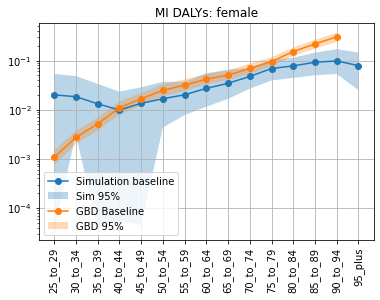

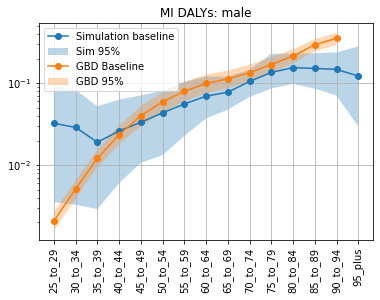

In [207]:
for sex in daly_MI_rate_allyear.sex.unique():
    plt.figure() 
    subdata = daly_MI_rate_allyear.loc[(daly_MI_rate_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_daly_MI.loc[(gbd_daly_MI.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'MI DALYs: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

### Incidence of Heart Failure (need to be overall)

In [208]:
gbd_hf_inc = get_draws(release_id=6,
         year_id=2019,
         sex_id=[1,2],
         location_id=523,
         age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32],
         gbd_id_type='modelable_entity_id',
         gbd_id=2412,
         measure_id = 6,
         metric_id = 3,
         source='epi')

RotisserieServerError: Failed to query Rotisserie with status code 500 and reason phrase Internal Server Error. Server sent additional message Internal server error. If you are seeing this error from a shared functions call, please file a help ticket with Central Computation

In [ ]:
gbd_hf_inc_data = gbd_hf_inc.iloc[:,1:1001].apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
gbd_hf_inc = pd.concat([gbd_hf_inc, gbd_hf_inc_data], axis=1)
gbd_hf_inc['age_group'] = np.where(gbd_hf_inc['age_group_id']==10,'25_to_29',np.where(gbd_hf_inc['age_group_id']==11,'30_to_34',np.where(gbd_hf_inc['age_group_id']==12,'35_to_39',np.where(gbd_hf_inc['age_group_id']==13,'40_to_44',np.where(gbd_hf_inc['age_group_id']==14,'45_to_49',np.where(gbd_hf_inc['age_group_id']==15,'50_to_54',np.where(gbd_hf_inc['age_group_id']==16,'55_to_59',np.where(gbd_hf_inc['age_group_id']==17,'60_to_64',np.where(gbd_hf_inc['age_group_id']==18,'65_to_69',np.where(gbd_hf_inc['age_group_id']==19,'70_to_74',np.where(gbd_hf_inc['age_group_id']==20,'75_to_79',np.where(gbd_hf_inc['age_group_id']==30,'80_to_84',np.where(gbd_hf_inc['age_group_id']==31,'85_to_89',np.where(gbd_hf_inc['age_group_id']==32,'90_to_94',0))))))))))))))
gbd_hf_inc['sex'] = np.where(gbd_hf_inc['sex_id']==1,'male','female')
gbd_hf_inc

In [166]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure']))].reset_index()
tran_rate_HF = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_residual']))].reset_index()
groupby_cols = ['age', 'sex', 'input_draw']
tran_rate_HF = tran_rate_HF.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_summ = (tran_rate_HF.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_summ.head()

mean      2.5%     97.5%
age      sex                                 
25_to_29 female  0.000735  0.000493  0.000957
         male    0.001069  0.000797  0.001180
30_to_34 female  0.000722  0.000534  0.000922
         male    0.000980  0.000795  0.001208
35_to_39 female  0.000590  0.000442  0.000689

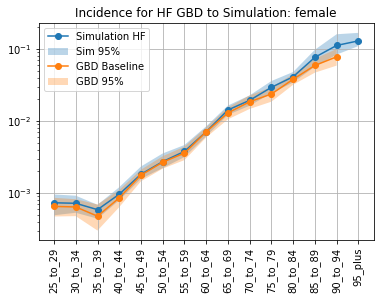

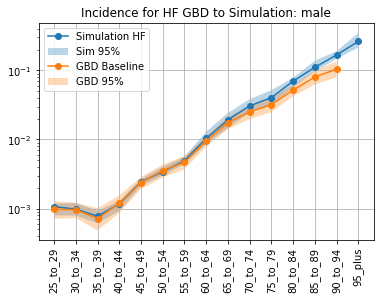

In [167]:
for sex in tran_rate_HF_summ.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = gbd_hf_inc.loc[(gbd_hf_inc.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for HF GBD to Simulation: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation HF', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

### Prevalence of Heart Failure

In [168]:
gbd_hf_prev = get_draws(release_id=6,
         year_id=2019,
         sex_id=[1,2],
         location_id=523,
         age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32],
         gbd_id_type='modelable_entity_id',
         gbd_id=2412,
         measure_id = 5,
         metric_id = 3,
         source='epi')

In [169]:
gbd_hf_prev_data = gbd_hf_prev.iloc[:,1:1001].apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
gbd_hf_prev = pd.concat([gbd_hf_prev, gbd_hf_prev_data], axis=1)
gbd_hf_prev['age_group'] = np.where(gbd_hf_prev['age_group_id']==10,'25_to_29',np.where(gbd_hf_prev['age_group_id']==11,'30_to_34',np.where(gbd_hf_prev['age_group_id']==12,'35_to_39',np.where(gbd_hf_prev['age_group_id']==13,'40_to_44',np.where(gbd_hf_prev['age_group_id']==14,'45_to_49',np.where(gbd_hf_prev['age_group_id']==15,'50_to_54',np.where(gbd_hf_prev['age_group_id']==16,'55_to_59',np.where(gbd_hf_prev['age_group_id']==17,'60_to_64',np.where(gbd_hf_prev['age_group_id']==18,'65_to_69',np.where(gbd_hf_prev['age_group_id']==19,'70_to_74',np.where(gbd_hf_prev['age_group_id']==20,'75_to_79',np.where(gbd_hf_prev['age_group_id']==30,'80_to_84',np.where(gbd_hf_prev['age_group_id']==31,'85_to_89',np.where(gbd_hf_prev['age_group_id']==32,'90_to_94',0))))))))))))))
gbd_hf_prev['sex'] = np.where(gbd_hf_prev['sex_id']==1,'male','female')
gbd_hf_prev

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,year_id,metric_id,model_version_id,modelable_entity_id,index,mean,2.5%,97.5%,age_group,sex
0,10,0.002602,0.002432,0.002289,0.002948,0.002625,0.002922,0.002295,0.002586,0.002454,...,2019,3,474434,2412,0,0.002565,0.001943,0.003309,25_to_29,female
1,11,0.003730,0.003362,0.003287,0.004099,0.003751,0.004369,0.003254,0.003637,0.003456,...,2019,3,474434,2412,1,0.003761,0.002759,0.004986,30_to_34,female
2,12,0.003570,0.003483,0.003662,0.004097,0.003479,0.003984,0.003749,0.003560,0.003383,...,2019,3,474434,2412,2,0.003672,0.002782,0.004679,35_to_39,female
3,13,0.003256,0.003702,0.004112,0.003935,0.003278,0.003298,0.004402,0.003590,0.003268,...,2019,3,474434,2412,3,0.003482,0.002716,0.004423,40_to_44,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,20,0.112510,0.109840,0.115690,0.118510,0.107500,0.112420,0.115820,0.121190,0.118430,...,2019,3,474434,2412,24,0.117334,0.099809,0.137511,75_to_79,male
25,30,0.148220,0.149990,0.159450,0.149970,0.148380,0.149230,0.157900,0.163240,0.158390,...,2019,3,474434,2412,25,0.156597,0.134990,0.182642,80_to_84,male
26,31,0.217350,0.221070,0.213370,0.208870,0.214470,0.202890,0.237280,0.235780,0.225920,...,2019,3,474434,2412,26,0.221997,0.197069,0.250608,85_to_89,male
27,32,0.281140,0.283330,0.254370,0.270000,0.273960,0.246420,0.307470,0.301880,0.289700,...,2019,3,474434,2412,27,0.279154,0.241288,0.323885,90_to_94,male


In [170]:
prev_HF = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual'))].reset_index()
prev_HF = prev_HF.rename(columns = {'ptvalue':'value'})
prev_HF = prev_HF.groupby(['age','sex','year','input_draw']).value.sum().reset_index()
prev_HF = prev_HF.merge(per_time_group[['age','sex','year','input_draw','ptvalue']], on=['age','sex','year','input_draw'])
prev_HF['rate']= prev_HF['value'] / prev_HF['ptvalue']
prev_HF_summ = (prev_HF
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_summ.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.002811,0.001973,0.003936
1,25_to_29,male,0.003639,0.002557,0.004564
2,30_to_34,female,0.003969,0.002766,0.005657
3,30_to_34,male,0.005080,0.003792,0.006869
4,35_to_39,female,0.004170,0.003103,0.005600


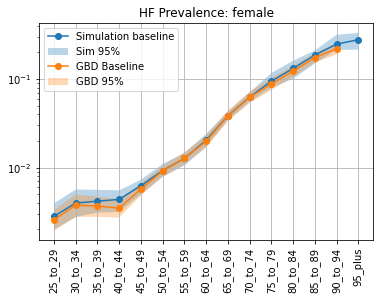

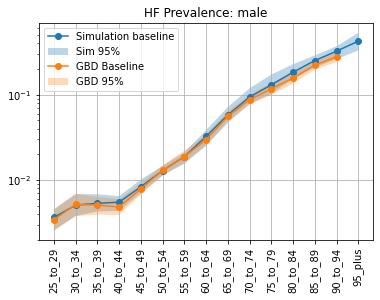

In [171]:
for sex in prev_HF_summ.sex.unique():
    plt.figure() 
    subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_hf_prev.loc[(gbd_hf_prev.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'HF Prevalence: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 